In [1]:
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

from PIL import Image, ImageDraw

In [2]:
cc = np.array([[1000 == np.round((x - 50)**2 + (y - 50)**2) for y in range(0, 101)] for x in range(0, 101)]).astype(np.uint8)

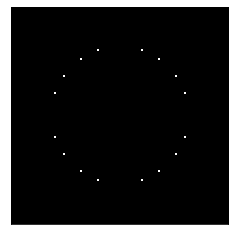

In [3]:
plt.imshow(cc, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
steps = 101
points = []

In [5]:
for rr in range(10, 61):
    for t in range(steps):
        points.append((rr, int(rr * np.cos(2 * np.pi * t / steps)), int(rr * np.sin(2 * np.pi * t / steps))))

In [6]:
xyr = np.zeros([101,101,101])

In [7]:
pts = np.array(points)

In [8]:
acc = defaultdict(int)

In [9]:
for cx in np.arange(101):
    for cy in np.arange(101):
        if cc[cx, cy] > 0:    
            for r, x, y in points:
                if ((x + cx) > 99) or ((x + cx) < 0): continue
                if ((y + cy) > 99) or ((y + cy) < 0): continue
                xyr[x + cx, y + cy, r] += 1
                acc[(x + cx, y + cy, r)] += 1

In [10]:
xyr.shape

(101, 101, 101)

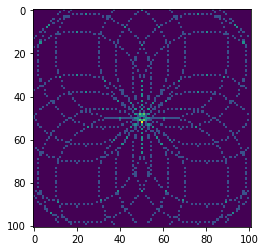

In [11]:
plt.imshow(xyr[:, :, 31])

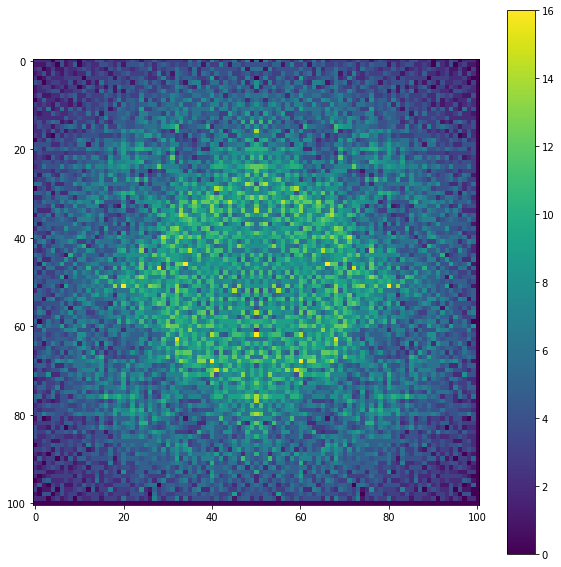

In [12]:
fig = plt.figure(figsize=(10,10))
plt.imshow(xyr.sum(axis=2))
plt.colorbar()

In [13]:
threshold = 0.01

In [14]:
circles = []
for k, v in sorted(acc.items(), key=lambda i: -i[1]):
#     print(k, v)
    x, y, r = k
    if v / steps >= threshold and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
        print(v / steps, x, y, r)
        circles.append((x, y, r))

0.07920792079207921 50 50 32
0.0594059405940594 15 32 10
0.0594059405940594 15 68 10
0.04950495049504951 32 15 10
0.04950495049504951 32 85 10
0.04950495049504951 68 15 10
0.04950495049504951 68 85 10
0.039603960396039604 17 50 11
0.039603960396039604 20 20 21
0.039603960396039604 20 80 21
0.039603960396039604 78 22 11
0.039603960396039604 78 78 11
0.039603960396039604 85 32 10
0.039603960396039604 85 68 10
0.039603960396039604 85 50 12
0.0297029702970297 50 17 11
0.0297029702970297 50 83 11
0.019801980198019802 10 41 11
0.019801980198019802 3 50 20
0.019801980198019802 0 27 25
0.019801980198019802 3 2 42
0.019801980198019802 0 73 25
0.019801980198019802 3 98 42
0.019801980198019802 57 2 45
0.019801980198019802 57 98 45
0.019801980198019802 98 34 41
0.019801980198019802 99 75 25


In [15]:
input_image = Image.fromarray(np.uint8(cc*255))

In [16]:
output_image = Image.new("RGB", input_image.size)
output_image.paste(input_image)
draw_result = ImageDraw.Draw(output_image)

In [17]:
for x, y, r in circles:
    draw_result.ellipse((x-r, y-r, x+r, y+r), outline=(255,0,0,0))

In [18]:
# output_image.save("../images/test_101_2.png")

In [24]:
len(acc)

51630

In [27]:
for k, v in acc.items():
    print(k, v)

(30, 40, 10) 1
(29, 40, 10) 4
(29, 41, 10) 2
(29, 42, 10) 1
(29, 43, 10) 2
(29, 44, 10) 1
(28, 44, 10) 1
(28, 45, 10) 2
(27, 46, 10) 2
(26, 47, 10) 2
(25, 48, 10) 2
(24, 48, 10) 1
(24, 49, 10) 1
(23, 49, 10) 2
(22, 49, 10) 2
(21, 49, 10) 1
(20, 49, 10) 3
(19, 49, 10) 2
(18, 49, 10) 2
(17, 49, 10) 1
(16, 49, 10) 1
(16, 48, 10) 1
(15, 48, 10) 2
(14, 47, 10) 2
(13, 47, 10) 1
(13, 46, 10) 2
(12, 45, 10) 2
(12, 44, 10) 1
(11, 43, 10) 2
(11, 42, 10) 2
(11, 41, 10) 1
(11, 40, 10) 4
(11, 39, 10) 1
(11, 38, 10) 2
(11, 37, 10) 2
(12, 36, 10) 1
(12, 35, 10) 2
(13, 34, 10) 2
(13, 33, 10) 1
(14, 33, 10) 2
(15, 32, 10) 6
(16, 32, 10) 1
(16, 31, 10) 1
(17, 31, 10) 1
(18, 31, 10) 2
(19, 31, 10) 2
(20, 31, 10) 3
(21, 31, 10) 1
(22, 31, 10) 2
(23, 31, 10) 2
(24, 31, 10) 1
(24, 32, 10) 1
(25, 32, 10) 2
(26, 33, 10) 2
(27, 34, 10) 2
(28, 35, 10) 2
(28, 36, 10) 1
(29, 36, 10) 1
(29, 37, 10) 2
(29, 38, 10) 1
(29, 39, 10) 2
(31, 40, 11) 2
(30, 40, 11) 3
(30, 41, 11) 1
(30, 42, 11) 2
(30, 43, 11) 1
(30, 44, 1

(36, 51, 20) 1
(35, 52, 20) 2
(34, 53, 20) 1
(33, 54, 20) 1
(32, 55, 20) 1
(31, 56, 20) 1
(30, 56, 20) 1
(29, 57, 20) 2
(28, 58, 20) 1
(27, 58, 20) 1
(26, 58, 20) 1
(25, 59, 20) 1
(24, 59, 20) 1
(22, 59, 20) 2
(21, 59, 20) 1
(20, 59, 20) 2
(18, 59, 20) 1
(17, 59, 20) 1
(16, 59, 20) 1
(15, 59, 20) 1
(13, 58, 20) 1
(12, 58, 20) 1
(11, 57, 20) 1
(10, 57, 20) 1
(9, 56, 20) 2
(8, 55, 20) 1
(7, 54, 20) 1
(6, 54, 20) 1
(5, 53, 20) 1
(5, 52, 20) 1
(4, 51, 20) 1
(3, 50, 20) 2
(3, 48, 20) 1
(2, 47, 20) 1
(2, 46, 20) 1
(1, 45, 20) 1
(1, 44, 20) 1
(1, 43, 20) 1
(1, 41, 20) 1
(1, 40, 20) 2
(1, 39, 20) 1
(1, 37, 20) 1
(1, 36, 20) 1
(1, 35, 20) 1
(2, 34, 20) 1
(2, 33, 20) 1
(3, 32, 20) 1
(3, 30, 20) 1
(4, 29, 20) 1
(5, 28, 20) 2
(5, 27, 20) 2
(6, 26, 20) 2
(7, 26, 20) 1
(8, 25, 20) 1
(9, 24, 20) 1
(10, 23, 20) 1
(11, 23, 20) 1
(12, 22, 20) 1
(13, 22, 20) 1
(15, 21, 20) 1
(16, 21, 20) 1
(17, 21, 20) 1
(18, 21, 20) 1
(20, 21, 20) 2
(21, 21, 20) 2
(22, 21, 20) 1
(24, 21, 20) 1
(25, 21, 20) 1
(26, 22, 20

(29, 7, 35) 1
(31, 7, 35) 1
(33, 8, 35) 1
(35, 9, 35) 1
(37, 10, 35) 1
(39, 11, 35) 1
(40, 12, 35) 1
(42, 14, 35) 1
(44, 15, 35) 1
(45, 17, 35) 2
(47, 18, 35) 1
(48, 20, 35) 1
(49, 22, 35) 1
(50, 24, 35) 1
(51, 26, 35) 1
(52, 28, 35) 1
(53, 30, 35) 1
(53, 32, 35) 1
(54, 34, 35) 1
(54, 36, 35) 1
(54, 38, 35) 2
(56, 40, 36) 1
(55, 42, 36) 1
(55, 44, 36) 1
(55, 46, 36) 1
(54, 48, 36) 1
(54, 51, 36) 2
(53, 53, 36) 2
(52, 55, 36) 3
(51, 57, 36) 2
(50, 59, 36) 1
(49, 60, 36) 1
(47, 62, 36) 1
(46, 64, 36) 1
(44, 66, 36) 1
(43, 67, 36) 1
(41, 68, 36) 1
(39, 70, 36) 1
(37, 71, 36) 1
(35, 72, 36) 1
(33, 73, 36) 2
(31, 74, 36) 1
(29, 74, 36) 1
(27, 75, 36) 1
(25, 75, 36) 2
(22, 75, 36) 1
(20, 75, 36) 1
(19, 75, 36) 1
(17, 75, 36) 1
(14, 75, 36) 1
(12, 75, 36) 1
(10, 74, 36) 1
(8, 73, 36) 1
(6, 72, 36) 1
(4, 71, 36) 1
(2, 70, 36) 1
(0, 69, 36) 1
(0, 11, 36) 1
(2, 10, 36) 1
(4, 9, 36) 1
(6, 8, 36) 1
(8, 7, 36) 1
(10, 6, 36) 1
(12, 5, 36) 1
(14, 5, 36) 1
(17, 5, 36) 1
(19, 5, 36) 1
(20, 5, 36) 1
(22

(36, 0, 44) 1
(39, 1, 44) 1
(41, 2, 44) 1
(43, 4, 44) 2
(46, 5, 44) 1
(48, 7, 44) 1
(50, 9, 44) 1
(52, 11, 44) 1
(54, 13, 44) 1
(55, 15, 44) 1
(57, 17, 44) 1
(58, 19, 44) 1
(59, 22, 44) 1
(60, 24, 44) 1
(61, 27, 44) 2
(62, 30, 44) 1
(63, 32, 44) 1
(63, 35, 44) 1
(63, 38, 44) 1
(65, 40, 45) 1
(64, 42, 45) 1
(64, 45, 45) 1
(64, 48, 45) 1
(63, 51, 45) 1
(62, 53, 45) 1
(61, 56, 45) 1
(60, 58, 45) 3
(59, 61, 45) 1
(58, 63, 45) 1
(56, 66, 45) 1
(54, 68, 45) 1
(53, 70, 45) 2
(51, 72, 45) 1
(48, 74, 45) 1
(46, 76, 45) 1
(44, 77, 45) 1
(42, 79, 45) 1
(39, 80, 45) 1
(37, 81, 45) 1
(34, 82, 45) 1
(31, 83, 45) 1
(29, 84, 45) 1
(26, 84, 45) 1
(23, 84, 45) 1
(20, 84, 45) 1
(18, 84, 45) 1
(16, 84, 45) 2
(13, 84, 45) 1
(10, 83, 45) 1
(7, 83, 45) 1
(5, 82, 45) 1
(2, 81, 45) 1
(0, 79, 45) 1
(0, 1, 45) 1
(39, 0, 45) 1
(42, 1, 45) 1
(44, 3, 45) 1
(46, 4, 45) 1
(48, 6, 45) 1
(51, 8, 45) 1
(53, 10, 45) 1
(54, 12, 45) 1
(56, 14, 45) 1
(58, 17, 45) 1
(59, 19, 45) 1
(60, 22, 45) 1
(61, 24, 45) 1
(62, 27, 45) 1

(68, 74, 60) 1
(66, 77, 60) 1
(64, 80, 60) 1
(61, 83, 60) 1
(58, 85, 60) 1
(55, 88, 60) 2
(52, 90, 60) 1
(49, 92, 60) 1
(46, 94, 60) 1
(42, 95, 60) 1
(39, 96, 60) 1
(35, 97, 60) 1
(32, 98, 60) 1
(28, 99, 60) 1
(24, 99, 60) 1
(20, 99, 60) 1
(18, 99, 60) 1
(14, 99, 60) 1
(10, 99, 60) 1
(7, 98, 60) 1
(3, 97, 60) 1
(64, 0, 60) 1
(66, 3, 60) 1
(68, 6, 60) 1
(70, 9, 60) 2
(72, 12, 60) 1
(74, 15, 60) 1
(75, 19, 60) 1
(77, 22, 60) 1
(78, 26, 60) 1
(78, 29, 60) 1
(79, 33, 60) 1
(79, 37, 60) 1
(30, 60, 10) 1
(29, 60, 10) 4
(29, 61, 10) 2
(29, 62, 10) 1
(29, 63, 10) 2
(29, 64, 10) 1
(28, 64, 10) 1
(28, 65, 10) 2
(27, 66, 10) 2
(26, 67, 10) 2
(25, 68, 10) 2
(24, 68, 10) 1
(24, 69, 10) 1
(23, 69, 10) 2
(22, 69, 10) 2
(21, 69, 10) 1
(20, 69, 10) 3
(19, 69, 10) 2
(18, 69, 10) 2
(17, 69, 10) 1
(16, 69, 10) 1
(16, 68, 10) 1
(15, 68, 10) 6
(14, 67, 10) 2
(13, 67, 10) 1
(13, 66, 10) 2
(12, 65, 10) 2
(12, 64, 10) 1
(11, 63, 10) 2
(11, 62, 10) 2
(11, 61, 10) 1
(11, 60, 10) 4
(11, 59, 10) 1
(11, 58, 10) 2
(

(7, 71, 18) 2
(6, 70, 18) 2
(5, 69, 18) 1
(4, 68, 18) 1
(4, 67, 18) 1
(4, 66, 18) 1
(3, 64, 18) 1
(3, 63, 18) 1
(3, 62, 18) 1
(3, 61, 18) 1
(3, 60, 18) 2
(3, 59, 18) 1
(3, 58, 18) 1
(3, 57, 18) 1
(3, 56, 18) 1
(4, 54, 18) 1
(4, 53, 18) 1
(4, 52, 18) 1
(5, 51, 18) 1
(7, 49, 18) 1
(8, 48, 18) 1
(8, 47, 18) 1
(9, 46, 18) 1
(10, 46, 18) 1
(11, 45, 18) 1
(12, 45, 18) 2
(13, 44, 18) 1
(14, 44, 18) 1
(15, 43, 18) 1
(16, 43, 18) 1
(17, 43, 18) 1
(19, 43, 18) 1
(20, 43, 18) 2
(21, 43, 18) 1
(22, 43, 18) 1
(23, 43, 18) 1
(24, 43, 18) 1
(25, 43, 18) 1
(26, 44, 18) 1
(27, 44, 18) 1
(28, 45, 18) 1
(29, 45, 18) 1
(30, 46, 18) 1
(31, 47, 18) 1
(32, 47, 18) 2
(33, 48, 18) 1
(33, 49, 18) 1
(35, 51, 18) 1
(35, 52, 18) 1
(36, 53, 18) 1
(36, 54, 18) 1
(37, 55, 18) 1
(37, 56, 18) 2
(37, 57, 18) 2
(37, 58, 18) 1
(37, 59, 18) 2
(39, 60, 19) 1
(38, 61, 19) 1
(38, 62, 19) 2
(38, 63, 19) 1
(38, 64, 19) 1
(38, 65, 19) 1
(37, 66, 19) 1
(37, 68, 19) 1
(36, 69, 19) 1
(36, 70, 19) 1
(35, 71, 19) 1
(34, 72, 19) 1
(33

(44, 63, 25) 1
(44, 64, 25) 1
(44, 66, 25) 1
(43, 67, 25) 1
(43, 69, 25) 1
(42, 70, 25) 1
(41, 71, 25) 1
(41, 73, 25) 1
(40, 74, 25) 1
(39, 75, 25) 1
(38, 76, 25) 1
(37, 78, 25) 1
(36, 79, 25) 1
(34, 80, 25) 1
(33, 80, 25) 1
(32, 81, 25) 1
(30, 82, 25) 1
(29, 83, 25) 1
(28, 83, 25) 1
(26, 84, 25) 1
(25, 84, 25) 1
(23, 84, 25) 1
(21, 84, 25) 1
(20, 84, 25) 1
(19, 84, 25) 1
(18, 84, 25) 1
(16, 84, 25) 1
(15, 84, 25) 1
(13, 83, 25) 1
(12, 83, 25) 1
(10, 82, 25) 1
(9, 82, 25) 1
(8, 81, 25) 2
(6, 80, 25) 1
(5, 79, 25) 1
(4, 78, 25) 1
(3, 77, 25) 1
(2, 76, 25) 1
(1, 75, 25) 1
(0, 73, 25) 2
(0, 47, 25) 1
(1, 45, 25) 1
(2, 44, 25) 1
(3, 43, 25) 1
(4, 42, 25) 1
(5, 41, 25) 1
(6, 40, 25) 1
(8, 39, 25) 1
(9, 38, 25) 1
(10, 38, 25) 1
(12, 37, 25) 2
(13, 37, 25) 1
(15, 36, 25) 1
(16, 36, 25) 1
(18, 36, 25) 1
(19, 36, 25) 1
(20, 36, 25) 1
(21, 36, 25) 1
(23, 36, 25) 1
(25, 36, 25) 1
(26, 36, 25) 1
(28, 37, 25) 1
(29, 37, 25) 1
(30, 38, 25) 1
(32, 39, 25) 1
(33, 40, 25) 1
(34, 40, 25) 1
(36, 41, 25) 

(34, 90, 34) 1
(32, 91, 34) 1
(30, 92, 34) 1
(28, 92, 34) 1
(26, 93, 34) 1
(24, 93, 34) 1
(22, 93, 34) 1
(20, 93, 34) 1
(19, 93, 34) 1
(17, 93, 34) 1
(15, 93, 34) 1
(13, 93, 34) 1
(11, 92, 34) 1
(9, 91, 34) 1
(7, 91, 34) 1
(5, 90, 34) 1
(3, 89, 34) 1
(1, 87, 34) 1
(1, 33, 34) 1
(3, 31, 34) 1
(5, 30, 34) 1
(7, 29, 34) 1
(9, 29, 34) 1
(11, 28, 34) 1
(13, 27, 34) 1
(15, 27, 34) 1
(17, 27, 34) 1
(19, 27, 34) 1
(20, 27, 34) 1
(22, 27, 34) 1
(24, 27, 34) 1
(26, 27, 34) 1
(28, 28, 34) 1
(30, 28, 34) 1
(32, 29, 34) 1
(34, 30, 34) 1
(36, 31, 34) 1
(38, 32, 34) 1
(40, 33, 34) 1
(41, 34, 34) 1
(43, 36, 34) 1
(44, 37, 34) 1
(46, 39, 34) 1
(47, 41, 34) 2
(48, 42, 34) 1
(49, 44, 34) 1
(50, 46, 34) 1
(51, 48, 34) 2
(52, 52, 34) 1
(53, 54, 34) 2
(53, 56, 34) 1
(53, 58, 34) 1
(55, 60, 35) 1
(54, 62, 35) 2
(54, 64, 35) 1
(54, 66, 35) 1
(53, 68, 35) 1
(53, 70, 35) 1
(52, 72, 35) 1
(51, 74, 35) 1
(50, 76, 35) 1
(49, 78, 35) 1
(48, 80, 35) 1
(47, 82, 35) 1
(45, 83, 35) 2
(44, 85, 35) 1
(42, 86, 35) 1
(40, 

(34, 17, 46) 1
(37, 18, 46) 1
(40, 19, 46) 1
(42, 20, 46) 1
(45, 22, 46) 1
(47, 24, 46) 1
(49, 25, 46) 1
(51, 27, 46) 1
(53, 29, 46) 2
(55, 31, 46) 1
(57, 34, 46) 1
(58, 36, 46) 1
(60, 39, 46) 2
(61, 41, 46) 2
(62, 44, 46) 2
(63, 46, 46) 1
(64, 49, 46) 1
(65, 52, 46) 1
(65, 55, 46) 2
(65, 58, 46) 2
(67, 60, 47) 1
(66, 62, 47) 1
(66, 65, 47) 1
(66, 68, 47) 1
(65, 71, 47) 1
(64, 74, 47) 1
(63, 77, 47) 1
(62, 79, 47) 1
(61, 82, 47) 2
(59, 84, 47) 1
(58, 87, 47) 1
(56, 89, 47) 1
(54, 91, 47) 1
(52, 94, 47) 1
(50, 95, 47) 1
(47, 97, 47) 1
(45, 99, 47) 1
(1, 18, 47) 1
(4, 16, 47) 1
(7, 16, 47) 1
(10, 15, 47) 1
(12, 14, 47) 1
(15, 14, 47) 1
(18, 14, 47) 1
(20, 14, 47) 1
(23, 14, 47) 2
(26, 14, 47) 1
(29, 14, 47) 1
(32, 15, 47) 1
(35, 16, 47) 1
(37, 17, 47) 1
(40, 18, 47) 1
(43, 20, 47) 1
(45, 21, 47) 1
(47, 23, 47) 1
(50, 25, 47) 1
(52, 26, 47) 1
(54, 29, 47) 1
(56, 31, 47) 1
(58, 33, 47) 1
(59, 36, 47) 1
(61, 38, 47) 1
(62, 41, 47) 3
(63, 43, 47) 1
(64, 46, 47) 1
(65, 49, 47) 1
(66, 52, 47) 

(78, 53, 59) 2
(78, 57, 59) 1
(80, 60, 60) 1
(79, 63, 60) 1
(79, 67, 60) 1
(78, 71, 60) 1
(78, 74, 60) 1
(77, 78, 60) 1
(75, 81, 60) 1
(74, 85, 60) 1
(72, 88, 60) 1
(70, 91, 60) 2
(68, 94, 60) 1
(66, 97, 60) 1
(3, 3, 60) 1
(7, 2, 60) 1
(10, 1, 60) 1
(14, 1, 60) 1
(18, 1, 60) 1
(20, 1, 60) 1
(24, 1, 60) 1
(28, 1, 60) 1
(32, 2, 60) 1
(35, 3, 60) 1
(39, 4, 60) 1
(42, 5, 60) 1
(46, 6, 60) 1
(49, 8, 60) 1
(52, 10, 60) 1
(55, 12, 60) 2
(58, 15, 60) 1
(61, 17, 60) 1
(64, 20, 60) 1
(66, 23, 60) 1
(68, 26, 60) 1
(70, 29, 60) 1
(72, 32, 60) 1
(74, 35, 60) 1
(75, 39, 60) 1
(77, 42, 60) 1
(78, 46, 60) 1
(78, 49, 60) 1
(79, 53, 60) 2
(79, 57, 60) 1
(34, 32, 10) 1
(33, 32, 10) 2
(33, 33, 10) 3
(33, 34, 10) 1
(33, 35, 10) 2
(33, 36, 10) 1
(32, 36, 10) 1
(32, 37, 10) 2
(31, 38, 10) 2
(30, 39, 10) 2
(28, 40, 10) 1
(28, 41, 10) 1
(27, 41, 10) 2
(26, 41, 10) 2
(25, 41, 10) 1
(24, 41, 10) 3
(23, 41, 10) 2
(22, 41, 10) 2
(21, 41, 10) 1
(20, 41, 10) 1
(20, 40, 10) 1
(19, 40, 10) 2
(18, 39, 10) 2
(17, 39, 10

(8, 30, 17) 1
(8, 28, 17) 1
(8, 27, 17) 1
(9, 26, 17) 1
(9, 25, 17) 1
(10, 24, 17) 1
(10, 23, 17) 1
(11, 22, 17) 1
(12, 21, 17) 2
(13, 20, 17) 1
(14, 19, 17) 1
(15, 19, 17) 1
(16, 18, 17) 1
(17, 17, 17) 2
(18, 17, 17) 1
(19, 17, 17) 1
(20, 16, 17) 1
(21, 16, 17) 1
(22, 16, 17) 1
(23, 16, 17) 1
(24, 16, 17) 3
(25, 16, 17) 1
(26, 16, 17) 1
(27, 16, 17) 1
(28, 16, 17) 1
(29, 16, 17) 1
(30, 17, 17) 1
(31, 17, 17) 1
(32, 18, 17) 1
(33, 18, 17) 1
(34, 19, 17) 2
(35, 20, 17) 1
(36, 21, 17) 1
(37, 22, 17) 1
(37, 23, 17) 1
(38, 23, 17) 1
(38, 24, 17) 1
(39, 25, 17) 1
(39, 26, 17) 1
(40, 27, 17) 1
(40, 28, 17) 1
(40, 29, 17) 1
(40, 30, 17) 1
(40, 31, 17) 1
(42, 32, 18) 1
(41, 33, 18) 1
(41, 34, 18) 1
(41, 35, 18) 1
(41, 36, 18) 1
(41, 37, 18) 2
(40, 38, 18) 1
(40, 39, 18) 2
(39, 40, 18) 2
(39, 41, 18) 1
(38, 42, 18) 1
(36, 45, 18) 1
(35, 45, 18) 1
(34, 46, 18) 1
(33, 47, 18) 1
(31, 48, 18) 1
(30, 48, 18) 1
(29, 49, 18) 1
(28, 49, 18) 1
(27, 49, 18) 1
(26, 49, 18) 1
(25, 49, 18) 1
(24, 49, 18) 2


(7, 15, 25) 1
(8, 14, 25) 1
(9, 13, 25) 1
(10, 12, 25) 1
(12, 11, 25) 2
(13, 10, 25) 1
(14, 10, 25) 1
(16, 9, 25) 1
(17, 9, 25) 1
(19, 8, 25) 2
(20, 8, 25) 1
(22, 8, 25) 1
(23, 8, 25) 1
(24, 8, 25) 1
(25, 8, 25) 1
(27, 8, 25) 1
(29, 8, 25) 1
(30, 8, 25) 1
(32, 9, 25) 1
(33, 9, 25) 1
(34, 10, 25) 1
(36, 11, 25) 1
(37, 12, 25) 2
(38, 12, 25) 1
(40, 13, 25) 1
(41, 14, 25) 1
(42, 16, 25) 1
(43, 17, 25) 1
(44, 18, 25) 2
(45, 19, 25) 1
(45, 21, 25) 1
(46, 22, 25) 1
(47, 23, 25) 1
(47, 25, 25) 1
(48, 26, 25) 1
(48, 28, 25) 1
(48, 29, 25) 1
(48, 31, 25) 1
(50, 32, 26) 1
(49, 33, 26) 1
(49, 35, 26) 1
(49, 36, 26) 1
(49, 38, 26) 1
(48, 39, 26) 2
(48, 41, 26) 1
(47, 42, 26) 2
(46, 44, 26) 1
(46, 45, 26) 3
(45, 47, 26) 1
(44, 48, 26) 1
(43, 49, 26) 1
(41, 50, 26) 2
(40, 51, 26) 1
(39, 52, 26) 1
(38, 53, 26) 1
(36, 54, 26) 1
(35, 55, 26) 1
(33, 56, 26) 2
(32, 56, 26) 1
(30, 57, 26) 2
(29, 57, 26) 1
(27, 57, 26) 1
(26, 57, 26) 1
(24, 57, 26) 1
(23, 57, 26) 1
(22, 57, 26) 1
(20, 57, 26) 1
(18, 57, 26

(0, 53, 33) 1
(0, 11, 33) 1
(1, 9, 33) 1
(2, 8, 33) 1
(4, 7, 33) 1
(6, 5, 33) 1
(7, 4, 33) 1
(9, 3, 33) 1
(11, 2, 33) 1
(13, 2, 33) 2
(15, 1, 33) 1
(17, 0, 33) 1
(19, 0, 33) 1
(21, 0, 33) 1
(23, 0, 33) 1
(24, 0, 33) 1
(26, 0, 33) 1
(28, 0, 33) 1
(30, 0, 33) 1
(32, 1, 33) 1
(34, 1, 33) 1
(36, 2, 33) 1
(38, 3, 33) 1
(40, 4, 33) 1
(41, 5, 33) 1
(43, 6, 33) 1
(45, 7, 33) 1
(46, 9, 33) 1
(48, 10, 33) 1
(49, 12, 33) 1
(50, 13, 33) 1
(51, 15, 33) 1
(52, 17, 33) 1
(53, 19, 33) 1
(54, 20, 33) 2
(55, 22, 33) 1
(55, 24, 33) 1
(56, 26, 33) 1
(56, 28, 33) 1
(56, 30, 33) 1
(58, 32, 34) 1
(57, 34, 34) 1
(57, 36, 34) 1
(57, 38, 34) 1
(56, 40, 34) 1
(56, 42, 34) 1
(55, 44, 34) 1
(54, 46, 34) 1
(53, 48, 34) 1
(51, 51, 34) 1
(50, 53, 34) 1
(48, 55, 34) 1
(47, 56, 34) 1
(45, 58, 34) 1
(44, 59, 34) 2
(42, 60, 34) 1
(40, 61, 34) 1
(38, 62, 34) 1
(36, 63, 34) 1
(34, 64, 34) 1
(32, 64, 34) 1
(30, 65, 34) 2
(28, 65, 34) 1
(26, 65, 34) 1
(24, 65, 34) 1
(23, 65, 34) 1
(21, 65, 34) 1
(19, 65, 34) 1
(17, 65, 34) 1

(66, 19, 45) 1
(67, 21, 45) 1
(68, 24, 45) 1
(68, 27, 45) 1
(68, 30, 45) 1
(70, 32, 46) 1
(69, 34, 46) 1
(69, 37, 46) 1
(69, 40, 46) 1
(68, 43, 46) 1
(67, 46, 46) 1
(66, 48, 46) 1
(65, 51, 46) 1
(64, 53, 46) 1
(61, 58, 46) 1
(59, 61, 46) 1
(57, 63, 46) 1
(55, 65, 46) 1
(53, 67, 46) 1
(51, 68, 46) 1
(49, 70, 46) 1
(46, 72, 46) 1
(44, 73, 46) 1
(41, 74, 46) 1
(38, 75, 46) 1
(36, 76, 46) 1
(33, 77, 46) 1
(30, 77, 46) 1
(27, 77, 46) 1
(24, 77, 46) 1
(22, 77, 46) 1
(20, 77, 46) 1
(17, 77, 46) 1
(14, 76, 46) 1
(11, 76, 46) 1
(8, 75, 46) 1
(6, 74, 46) 1
(3, 72, 46) 1
(1, 71, 46) 1
(57, 1, 46) 2
(59, 3, 46) 1
(61, 6, 46) 1
(62, 8, 46) 1
(64, 11, 46) 1
(65, 13, 46) 1
(66, 16, 46) 1
(67, 18, 46) 1
(68, 21, 46) 1
(69, 24, 46) 1
(69, 27, 46) 1
(69, 30, 46) 1
(71, 32, 47) 1
(70, 34, 47) 1
(70, 37, 47) 1
(70, 40, 47) 1
(69, 43, 47) 1
(68, 46, 47) 1
(67, 49, 47) 1
(66, 51, 47) 1
(65, 54, 47) 1
(63, 56, 47) 1
(60, 61, 47) 1
(58, 63, 47) 1
(56, 66, 47) 1
(54, 67, 47) 1
(51, 69, 47) 1
(49, 71, 47) 1
(47

(77, 56, 59) 1
(75, 60, 59) 1
(73, 63, 59) 1
(71, 66, 59) 1
(69, 69, 59) 1
(67, 72, 59) 1
(64, 74, 59) 1
(62, 77, 59) 1
(59, 79, 59) 1
(56, 81, 59) 1
(52, 83, 59) 1
(49, 85, 59) 1
(46, 86, 59) 1
(42, 87, 59) 1
(39, 88, 59) 1
(35, 89, 59) 1
(32, 90, 59) 1
(28, 90, 59) 1
(24, 90, 59) 1
(22, 90, 59) 1
(18, 90, 59) 1
(14, 90, 59) 1
(11, 89, 59) 1
(7, 88, 59) 1
(4, 87, 59) 1
(0, 85, 59) 1
(73, 1, 59) 1
(75, 4, 59) 1
(77, 8, 59) 1
(78, 11, 59) 1
(80, 14, 59) 1
(81, 18, 59) 1
(81, 22, 59) 1
(82, 25, 59) 1
(82, 29, 59) 1
(84, 32, 60) 1
(83, 35, 60) 1
(83, 39, 60) 1
(82, 43, 60) 1
(82, 46, 60) 1
(81, 50, 60) 2
(78, 57, 60) 1
(76, 60, 60) 1
(74, 63, 60) 1
(72, 66, 60) 1
(70, 69, 60) 2
(68, 72, 60) 1
(65, 75, 60) 1
(62, 77, 60) 1
(59, 80, 60) 1
(56, 82, 60) 1
(53, 84, 60) 1
(50, 86, 60) 1
(46, 87, 60) 1
(43, 88, 60) 1
(39, 89, 60) 1
(36, 90, 60) 1
(32, 91, 60) 1
(28, 91, 60) 1
(24, 91, 60) 1
(22, 91, 60) 1
(18, 91, 60) 1
(14, 91, 60) 1
(11, 90, 60) 1
(7, 89, 60) 1
(3, 88, 60) 1
(0, 86, 60) 1
(74,

(42, 68, 18) 1
(41, 69, 18) 1
(41, 70, 18) 1
(41, 71, 18) 1
(41, 72, 18) 1
(41, 73, 18) 1
(40, 74, 18) 1
(40, 75, 18) 1
(39, 76, 18) 1
(39, 77, 18) 1
(38, 78, 18) 1
(37, 79, 18) 1
(37, 80, 18) 1
(36, 81, 18) 1
(35, 81, 18) 1
(34, 82, 18) 1
(33, 83, 18) 1
(32, 83, 18) 1
(31, 84, 18) 1
(30, 84, 18) 1
(29, 85, 18) 1
(28, 85, 18) 1
(27, 85, 18) 1
(26, 85, 18) 1
(25, 85, 18) 1
(24, 85, 18) 2
(23, 85, 18) 1
(21, 85, 18) 1
(20, 85, 18) 1
(19, 85, 18) 1
(18, 84, 18) 1
(17, 84, 18) 1
(16, 83, 18) 2
(15, 83, 18) 1
(14, 82, 18) 1
(13, 82, 18) 1
(12, 81, 18) 1
(12, 80, 18) 1
(11, 79, 18) 1
(10, 78, 18) 2
(9, 77, 18) 1
(8, 76, 18) 1
(8, 75, 18) 1
(8, 74, 18) 1
(7, 72, 18) 1
(7, 70, 18) 1
(7, 69, 18) 1
(7, 68, 18) 2
(7, 67, 18) 1
(7, 66, 18) 1
(7, 65, 18) 1
(7, 64, 18) 1
(8, 62, 18) 1
(8, 61, 18) 1
(8, 60, 18) 1
(9, 59, 18) 1
(10, 58, 18) 2
(11, 57, 18) 1
(12, 56, 18) 1
(13, 54, 18) 1
(14, 54, 18) 1
(15, 53, 18) 1
(16, 53, 18) 1
(17, 52, 18) 1
(18, 52, 18) 1
(19, 51, 18) 1
(20, 51, 18) 1
(21, 51, 18

(47, 66, 24) 2
(47, 67, 24) 1
(49, 68, 25) 1
(48, 69, 25) 1
(48, 71, 25) 1
(48, 72, 25) 1
(48, 74, 25) 1
(47, 75, 25) 1
(47, 77, 25) 1
(46, 78, 25) 1
(45, 79, 25) 1
(45, 81, 25) 1
(44, 82, 25) 2
(43, 83, 25) 1
(42, 84, 25) 1
(41, 86, 25) 1
(40, 87, 25) 1
(38, 88, 25) 1
(37, 88, 25) 2
(36, 89, 25) 1
(34, 90, 25) 1
(33, 91, 25) 1
(32, 91, 25) 1
(30, 92, 25) 1
(29, 92, 25) 1
(27, 92, 25) 1
(25, 92, 25) 1
(24, 92, 25) 1
(23, 92, 25) 1
(22, 92, 25) 1
(20, 92, 25) 1
(19, 92, 25) 2
(17, 91, 25) 1
(16, 91, 25) 1
(14, 90, 25) 1
(13, 90, 25) 1
(12, 89, 25) 2
(10, 88, 25) 1
(9, 87, 25) 1
(8, 86, 25) 1
(7, 85, 25) 1
(6, 84, 25) 1
(5, 83, 25) 1
(4, 81, 25) 1
(3, 80, 25) 1
(2, 79, 25) 1
(2, 77, 25) 1
(1, 76, 25) 1
(0, 74, 25) 1
(0, 71, 25) 1
(0, 70, 25) 1
(0, 68, 25) 2
(0, 66, 25) 1
(0, 65, 25) 1
(0, 63, 25) 1
(0, 62, 25) 1
(1, 60, 25) 1
(2, 59, 25) 1
(2, 57, 25) 1
(3, 56, 25) 1
(4, 55, 25) 1
(5, 53, 25) 1
(6, 52, 25) 1
(7, 51, 25) 1
(9, 49, 25) 1
(10, 48, 25) 1
(12, 47, 25) 1
(13, 46, 25) 1
(14, 46

(26, 36, 33) 1
(28, 36, 33) 1
(30, 36, 33) 1
(32, 37, 33) 1
(34, 37, 33) 1
(36, 38, 33) 1
(38, 39, 33) 1
(40, 40, 33) 2
(41, 41, 33) 1
(43, 42, 33) 1
(45, 43, 33) 2
(46, 45, 33) 1
(48, 46, 33) 1
(49, 48, 33) 1
(50, 49, 33) 3
(51, 51, 33) 2
(52, 53, 33) 2
(53, 55, 33) 2
(54, 56, 33) 2
(55, 58, 33) 1
(55, 60, 33) 1
(56, 62, 33) 1
(56, 64, 33) 1
(56, 66, 33) 1
(58, 68, 34) 1
(57, 70, 34) 1
(57, 72, 34) 1
(57, 74, 34) 1
(56, 76, 34) 1
(56, 78, 34) 1
(55, 80, 34) 1
(54, 82, 34) 1
(53, 84, 34) 1
(52, 86, 34) 1
(51, 87, 34) 1
(50, 89, 34) 1
(48, 91, 34) 1
(47, 92, 34) 1
(45, 94, 34) 1
(44, 95, 34) 1
(42, 96, 34) 1
(40, 97, 34) 1
(38, 98, 34) 1
(36, 99, 34) 1
(13, 99, 34) 1
(11, 99, 34) 1
(9, 98, 34) 1
(7, 97, 34) 1
(5, 95, 34) 1
(3, 94, 34) 1
(2, 93, 34) 1
(0, 91, 34) 1
(0, 45, 34) 1
(2, 43, 34) 1
(3, 42, 34) 1
(5, 41, 34) 1
(7, 39, 34) 1
(9, 38, 34) 1
(11, 37, 34) 2
(13, 37, 34) 1
(15, 36, 34) 1
(17, 35, 34) 1
(19, 35, 34) 1
(21, 35, 34) 1
(23, 35, 34) 1
(24, 35, 34) 1
(26, 35, 34) 1
(28, 35

(27, 24, 45) 1
(30, 24, 45) 1
(33, 24, 45) 1
(35, 25, 45) 1
(38, 26, 45) 1
(41, 27, 45) 1
(43, 28, 45) 1
(46, 29, 45) 1
(48, 31, 45) 1
(50, 32, 45) 1
(52, 34, 45) 1
(55, 36, 45) 1
(57, 38, 45) 1
(58, 40, 45) 2
(62, 45, 45) 1
(63, 47, 45) 1
(65, 52, 45) 1
(66, 55, 45) 1
(67, 57, 45) 1
(68, 60, 45) 1
(68, 63, 45) 1
(68, 66, 45) 1
(70, 68, 46) 1
(69, 70, 46) 1
(69, 73, 46) 1
(69, 76, 46) 1
(68, 79, 46) 1
(67, 82, 46) 1
(66, 84, 46) 1
(65, 87, 46) 1
(64, 89, 46) 1
(62, 92, 46) 1
(61, 94, 46) 1
(59, 97, 46) 1
(57, 99, 46) 2
(1, 29, 46) 1
(3, 28, 46) 1
(6, 26, 46) 1
(8, 25, 46) 1
(11, 24, 46) 1
(14, 24, 46) 1
(17, 23, 46) 1
(20, 23, 46) 1
(22, 23, 46) 1
(24, 23, 46) 1
(27, 23, 46) 1
(30, 23, 46) 1
(33, 23, 46) 1
(36, 24, 46) 1
(38, 25, 46) 1
(41, 26, 46) 1
(44, 27, 46) 1
(46, 28, 46) 1
(49, 30, 46) 1
(51, 32, 46) 1
(53, 33, 46) 1
(55, 35, 46) 1
(57, 37, 46) 1
(59, 39, 46) 1
(61, 42, 46) 1
(64, 47, 46) 1
(65, 49, 46) 1
(66, 52, 46) 1
(67, 54, 46) 1
(68, 57, 46) 1
(69, 60, 46) 1
(69, 63, 46) 1

(36, 16, 10) 1
(37, 16, 10) 2
(38, 17, 10) 2
(39, 18, 10) 2
(40, 19, 10) 2
(40, 20, 10) 1
(41, 20, 10) 1
(41, 21, 10) 2
(41, 22, 10) 1
(41, 23, 10) 2
(43, 24, 11) 1
(42, 24, 11) 2
(42, 25, 11) 1
(42, 26, 11) 2
(42, 27, 11) 1
(42, 28, 11) 1
(41, 28, 11) 1
(41, 29, 11) 2
(40, 30, 11) 5
(40, 31, 11) 1
(39, 31, 11) 1
(39, 32, 11) 1
(38, 32, 11) 1
(37, 33, 11) 2
(36, 33, 11) 1
(36, 34, 11) 1
(35, 34, 11) 1
(33, 34, 11) 1
(32, 34, 11) 3
(31, 34, 11) 2
(30, 34, 11) 1
(29, 34, 11) 2
(26, 33, 11) 1
(25, 32, 11) 1
(23, 29, 11) 1
(23, 28, 11) 1
(22, 28, 11) 1
(22, 27, 11) 2
(22, 26, 11) 1
(22, 25, 11) 2
(22, 24, 11) 2
(22, 23, 11) 2
(22, 21, 11) 2
(22, 20, 11) 1
(23, 20, 11) 1
(23, 19, 11) 1
(23, 18, 11) 1
(24, 18, 11) 1
(24, 17, 11) 1
(25, 17, 11) 1
(25, 16, 11) 1
(26, 16, 11) 1
(26, 15, 11) 1
(27, 15, 11) 2
(28, 14, 11) 1
(29, 14, 11) 2
(30, 14, 11) 1
(31, 14, 11) 3
(32, 14, 11) 4
(33, 14, 11) 1
(34, 14, 11) 2
(35, 14, 11) 1
(36, 14, 11) 1
(36, 15, 11) 1
(37, 15, 11) 2
(38, 16, 11) 1
(39, 16, 1

(34, 5, 20) 1
(36, 5, 20) 1
(37, 5, 20) 1
(38, 6, 20) 1
(39, 6, 20) 1
(40, 6, 20) 1
(41, 7, 20) 1
(42, 8, 20) 1
(43, 8, 20) 1
(44, 9, 20) 2
(45, 10, 20) 1
(46, 11, 20) 1
(47, 12, 20) 1
(48, 13, 20) 1
(48, 14, 20) 1
(49, 15, 20) 1
(50, 16, 20) 1
(50, 17, 20) 2
(51, 18, 20) 1
(51, 20, 20) 1
(51, 21, 20) 1
(51, 22, 20) 1
(51, 23, 20) 1
(53, 24, 21) 1
(52, 25, 21) 1
(52, 26, 21) 1
(52, 27, 21) 1
(52, 29, 21) 1
(51, 30, 21) 1
(51, 31, 21) 1
(51, 32, 21) 1
(50, 34, 21) 2
(49, 35, 21) 1
(49, 36, 21) 1
(48, 37, 21) 1
(47, 38, 21) 1
(46, 39, 21) 2
(45, 40, 21) 2
(44, 40, 21) 2
(43, 41, 21) 1
(41, 42, 21) 1
(39, 43, 21) 1
(38, 43, 21) 1
(37, 44, 21) 1
(36, 44, 21) 1
(34, 44, 21) 1
(30, 44, 21) 1
(29, 44, 21) 1
(28, 44, 21) 1
(26, 44, 21) 1
(25, 43, 21) 1
(24, 43, 21) 1
(23, 42, 21) 1
(22, 41, 21) 1
(21, 41, 21) 1
(19, 40, 21) 1
(18, 39, 21) 1
(18, 38, 21) 1
(17, 37, 21) 1
(16, 36, 21) 1
(15, 35, 21) 1
(14, 34, 21) 1
(14, 33, 21) 1
(13, 32, 21) 1
(13, 31, 21) 1
(12, 29, 21) 1
(12, 28, 21) 1
(12, 

(41, 57, 35) 1
(39, 58, 35) 1
(36, 58, 35) 1
(34, 58, 35) 2
(32, 58, 35) 1
(31, 58, 35) 1
(29, 58, 35) 1
(27, 58, 35) 1
(24, 58, 35) 1
(22, 57, 35) 1
(20, 56, 35) 1
(18, 55, 35) 1
(16, 55, 35) 1
(14, 53, 35) 1
(13, 52, 35) 1
(11, 51, 35) 1
(9, 50, 35) 2
(8, 48, 35) 1
(6, 46, 35) 1
(5, 45, 35) 1
(3, 43, 35) 1
(2, 41, 35) 1
(1, 39, 35) 1
(0, 37, 35) 1
(0, 35, 35) 1
(0, 13, 35) 1
(0, 11, 35) 1
(1, 9, 35) 1
(2, 7, 35) 1
(5, 3, 35) 1
(6, 2, 35) 1
(8, 0, 35) 1
(57, 1, 35) 1
(59, 2, 35) 1
(60, 4, 35) 1
(61, 6, 35) 1
(62, 8, 35) 1
(63, 10, 35) 1
(64, 12, 35) 1
(65, 14, 35) 1
(65, 16, 35) 1
(66, 18, 35) 1
(66, 20, 35) 1
(66, 22, 35) 1
(68, 24, 36) 1
(67, 26, 36) 1
(67, 28, 36) 1
(67, 30, 36) 1
(66, 32, 36) 1
(66, 35, 36) 1
(65, 37, 36) 1
(64, 39, 36) 1
(63, 41, 36) 1
(62, 43, 36) 1
(61, 44, 36) 1
(59, 46, 36) 1
(58, 48, 36) 1
(56, 50, 36) 2
(49, 55, 36) 2
(47, 56, 36) 1
(45, 57, 36) 2
(43, 58, 36) 1
(41, 58, 36) 1
(39, 59, 36) 1
(37, 59, 36) 1
(34, 59, 36) 1
(32, 59, 36) 2
(31, 59, 36) 1
(29, 5

(19, 68, 47) 1
(16, 68, 47) 1
(13, 66, 47) 1
(11, 65, 47) 1
(8, 64, 47) 1
(6, 62, 47) 1
(3, 60, 47) 1
(1, 58, 47) 1
(71, 0, 47) 1
(73, 2, 47) 1
(74, 5, 47) 1
(75, 7, 47) 1
(76, 10, 47) 1
(77, 13, 47) 1
(78, 16, 47) 1
(78, 19, 47) 1
(78, 22, 47) 1
(80, 24, 48) 1
(79, 26, 48) 1
(79, 29, 48) 1
(79, 32, 48) 1
(78, 35, 48) 1
(77, 38, 48) 1
(76, 41, 48) 1
(75, 44, 48) 1
(74, 46, 48) 1
(72, 49, 48) 1
(71, 51, 48) 1
(67, 56, 48) 1
(65, 58, 48) 1
(62, 60, 48) 1
(60, 62, 48) 1
(58, 64, 48) 2
(55, 65, 48) 2
(52, 67, 48) 2
(50, 68, 48) 1
(47, 69, 48) 2
(44, 70, 48) 1
(41, 71, 48) 1
(38, 71, 48) 1
(35, 71, 48) 1
(32, 71, 48) 1
(30, 71, 48) 1
(27, 71, 48) 1
(24, 71, 48) 1
(21, 70, 48) 1
(19, 69, 48) 1
(16, 68, 48) 1
(13, 67, 48) 1
(10, 66, 48) 1
(8, 65, 48) 1
(5, 63, 48) 1
(3, 61, 48) 1
(0, 59, 48) 1
(74, 2, 48) 1
(75, 4, 48) 1
(76, 7, 48) 1
(77, 10, 48) 1
(78, 13, 48) 2
(79, 16, 48) 1
(79, 19, 48) 1
(79, 22, 48) 1
(81, 24, 49) 1
(80, 27, 49) 1
(80, 30, 49) 1
(80, 33, 49) 1
(79, 36, 49) 1
(78, 38, 4

(25, 68, 11) 1
(26, 67, 11) 1
(29, 66, 11) 2
(30, 66, 11) 1
(31, 66, 11) 2
(32, 66, 11) 3
(33, 66, 11) 1
(35, 66, 11) 1
(36, 66, 11) 1
(36, 67, 11) 1
(37, 67, 11) 2
(38, 68, 11) 1
(39, 68, 11) 1
(39, 69, 11) 1
(40, 69, 11) 1
(40, 70, 11) 5
(41, 71, 11) 2
(41, 72, 11) 1
(42, 72, 11) 1
(42, 73, 11) 1
(42, 74, 11) 2
(42, 75, 11) 1
(44, 76, 12) 1
(43, 76, 12) 2
(43, 77, 12) 1
(43, 78, 12) 2
(43, 79, 12) 1
(43, 80, 12) 1
(42, 81, 12) 2
(42, 82, 12) 1
(41, 82, 12) 1
(41, 83, 12) 1
(40, 84, 12) 2
(39, 85, 12) 2
(38, 86, 12) 1
(37, 86, 12) 2
(36, 87, 12) 1
(35, 87, 12) 2
(34, 87, 12) 1
(33, 87, 12) 1
(32, 87, 12) 3
(31, 87, 12) 3
(30, 87, 12) 2
(29, 87, 12) 1
(28, 87, 12) 1
(28, 86, 12) 1
(27, 86, 12) 1
(26, 86, 12) 1
(26, 85, 12) 1
(25, 85, 12) 1
(24, 84, 12) 2
(23, 83, 12) 2
(23, 82, 12) 1
(22, 82, 12) 1
(22, 81, 12) 1
(21, 80, 12) 2
(21, 78, 12) 1
(21, 77, 12) 2
(21, 76, 12) 2
(21, 75, 12) 2
(21, 74, 12) 1
(21, 73, 12) 1
(21, 72, 12) 2
(22, 70, 12) 1
(23, 70, 12) 1
(23, 69, 12) 2
(24, 68, 1

(33, 95, 20) 1
(32, 95, 20) 2
(30, 95, 20) 1
(29, 95, 20) 1
(28, 95, 20) 2
(27, 95, 20) 1
(25, 94, 20) 1
(24, 94, 20) 1
(23, 93, 20) 1
(22, 93, 20) 1
(21, 92, 20) 1
(20, 91, 20) 1
(19, 90, 20) 1
(18, 90, 20) 1
(17, 89, 20) 1
(17, 88, 20) 1
(16, 87, 20) 1
(15, 86, 20) 1
(15, 84, 20) 1
(14, 83, 20) 1
(14, 82, 20) 1
(13, 81, 20) 1
(13, 80, 20) 1
(13, 79, 20) 1
(13, 77, 20) 1
(13, 76, 20) 2
(13, 75, 20) 1
(13, 73, 20) 1
(13, 72, 20) 1
(13, 71, 20) 1
(14, 70, 20) 1
(14, 69, 20) 1
(15, 68, 20) 1
(15, 66, 20) 1
(16, 65, 20) 1
(17, 64, 20) 1
(17, 63, 20) 1
(18, 62, 20) 1
(19, 62, 20) 1
(20, 61, 20) 1
(21, 60, 20) 1
(23, 59, 20) 1
(24, 58, 20) 1
(25, 58, 20) 1
(27, 57, 20) 1
(28, 57, 20) 1
(30, 57, 20) 1
(32, 57, 20) 2
(33, 57, 20) 1
(34, 57, 20) 1
(36, 57, 20) 1
(37, 57, 20) 1
(38, 58, 20) 1
(43, 60, 20) 1
(44, 61, 20) 2
(45, 62, 20) 1
(46, 63, 20) 1
(47, 64, 20) 1
(48, 65, 20) 2
(48, 66, 20) 1
(49, 67, 20) 1
(50, 68, 20) 1
(50, 69, 20) 2
(51, 70, 20) 1
(51, 72, 20) 1
(51, 73, 20) 1
(51, 74, 2

(7, 69, 27) 1
(7, 67, 27) 1
(8, 66, 27) 1
(8, 64, 27) 1
(9, 63, 27) 1
(10, 61, 27) 1
(11, 60, 27) 1
(12, 59, 27) 1
(13, 58, 27) 1
(14, 56, 27) 1
(16, 55, 27) 1
(17, 54, 27) 1
(19, 53, 27) 1
(20, 53, 27) 1
(21, 52, 27) 1
(23, 51, 27) 1
(25, 51, 27) 1
(40, 51, 27) 1
(42, 52, 27) 1
(48, 55, 27) 2
(49, 56, 27) 2
(50, 57, 27) 1
(51, 58, 27) 1
(52, 59, 27) 1
(53, 61, 27) 1
(54, 62, 27) 2
(55, 64, 27) 1
(56, 65, 27) 1
(57, 67, 27) 1
(57, 68, 27) 1
(58, 70, 27) 1
(58, 71, 27) 1
(58, 73, 27) 1
(58, 75, 27) 2
(60, 76, 28) 1
(59, 77, 28) 1
(59, 79, 28) 1
(59, 81, 28) 1
(59, 82, 28) 1
(58, 84, 28) 1
(58, 86, 28) 1
(57, 87, 28) 2
(56, 89, 28) 1
(55, 90, 28) 1
(54, 92, 28) 1
(53, 93, 28) 1
(52, 95, 28) 1
(51, 96, 28) 1
(50, 97, 28) 1
(48, 98, 28) 1
(47, 99, 28) 1
(18, 99, 28) 1
(17, 99, 28) 1
(15, 97, 28) 1
(14, 96, 28) 1
(13, 95, 28) 1
(11, 94, 28) 1
(10, 93, 28) 1
(8, 90, 28) 1
(7, 88, 28) 1
(7, 87, 28) 1
(6, 85, 28) 1
(5, 82, 28) 1
(5, 80, 28) 1
(5, 78, 28) 1
(5, 76, 28) 2
(5, 74, 28) 1
(5, 72, 2

(31, 40, 37) 1
(32, 40, 37) 1
(34, 40, 37) 1
(37, 40, 37) 1
(39, 40, 37) 1
(41, 41, 37) 1
(43, 41, 37) 1
(46, 42, 37) 1
(48, 43, 37) 1
(50, 44, 37) 1
(55, 48, 37) 1
(59, 51, 37) 1
(60, 53, 37) 1
(62, 55, 37) 1
(63, 57, 37) 1
(64, 59, 37) 1
(65, 61, 37) 1
(66, 63, 37) 1
(67, 65, 37) 1
(67, 67, 37) 1
(68, 70, 37) 1
(68, 72, 37) 1
(68, 74, 37) 2
(70, 76, 38) 1
(69, 78, 38) 1
(69, 80, 38) 1
(69, 83, 38) 1
(68, 85, 38) 1
(68, 87, 38) 1
(67, 89, 38) 1
(66, 92, 38) 1
(65, 94, 38) 2
(64, 96, 38) 1
(62, 98, 38) 1
(2, 99, 38) 1
(0, 95, 38) 1
(0, 57, 38) 1
(1, 55, 38) 1
(2, 53, 38) 1
(4, 52, 38) 1
(7, 48, 38) 1
(9, 47, 38) 1
(11, 45, 38) 1
(13, 44, 38) 1
(15, 43, 38) 1
(17, 42, 38) 1
(19, 41, 38) 1
(21, 40, 38) 1
(24, 40, 38) 1
(26, 39, 38) 1
(28, 39, 38) 2
(31, 39, 38) 1
(32, 39, 38) 1
(34, 39, 38) 1
(37, 39, 38) 1
(39, 39, 38) 1
(41, 40, 38) 1
(44, 41, 38) 1
(46, 41, 38) 1
(48, 42, 38) 1
(50, 43, 38) 1
(52, 45, 38) 2
(56, 47, 38) 1
(58, 49, 38) 1
(59, 51, 38) 1
(61, 52, 38) 1
(62, 54, 38) 1
(64

(30, 25, 52) 1
(32, 25, 52) 1
(36, 25, 52) 1
(39, 25, 52) 1
(42, 26, 52) 1
(45, 26, 52) 1
(48, 27, 52) 1
(51, 28, 52) 1
(54, 30, 52) 1
(57, 31, 52) 1
(60, 33, 52) 1
(62, 35, 52) 1
(65, 37, 52) 1
(70, 41, 52) 1
(72, 44, 52) 1
(74, 46, 52) 1
(76, 49, 52) 1
(77, 52, 52) 1
(79, 55, 52) 1
(80, 58, 52) 1
(81, 61, 52) 1
(82, 64, 52) 1
(83, 67, 52) 1
(83, 70, 52) 1
(83, 73, 52) 1
(85, 76, 53) 1
(84, 79, 53) 1
(84, 82, 53) 1
(84, 85, 53) 1
(83, 89, 53) 1
(82, 92, 53) 1
(81, 95, 53) 1
(80, 98, 53) 1
(0, 35, 53) 1
(2, 33, 53) 1
(5, 31, 53) 1
(8, 30, 53) 1
(11, 28, 53) 1
(14, 27, 53) 1
(17, 26, 53) 1
(20, 25, 53) 1
(23, 24, 53) 1
(27, 24, 53) 1
(30, 24, 53) 1
(32, 24, 53) 1
(36, 24, 53) 1
(39, 24, 53) 1
(42, 25, 53) 1
(45, 25, 53) 1
(49, 26, 53) 1
(52, 27, 53) 1
(55, 29, 53) 1
(58, 30, 53) 1
(60, 32, 53) 1
(63, 34, 53) 1
(66, 36, 53) 1
(70, 41, 53) 1
(73, 43, 53) 1
(75, 46, 53) 1
(76, 48, 53) 1
(78, 51, 53) 1
(80, 54, 53) 1
(81, 57, 53) 1
(82, 60, 53) 1
(83, 63, 53) 1
(84, 67, 53) 1
(84, 70, 53) 1

(44, 33, 14) 1
(43, 33, 14) 1
(41, 33, 14) 2
(40, 33, 14) 2
(39, 33, 14) 1
(38, 33, 14) 1
(36, 33, 14) 2
(35, 32, 14) 1
(34, 32, 14) 1
(33, 31, 14) 2
(32, 30, 14) 1
(31, 30, 14) 1
(31, 29, 14) 1
(30, 29, 14) 1
(29, 28, 14) 1
(29, 27, 14) 1
(28, 27, 14) 1
(28, 26, 14) 1
(28, 25, 14) 1
(27, 24, 14) 1
(27, 23, 14) 2
(27, 22, 14) 1
(27, 21, 14) 1
(27, 20, 14) 2
(27, 18, 14) 1
(27, 17, 14) 2
(27, 16, 14) 1
(28, 15, 14) 1
(28, 14, 14) 1
(28, 13, 14) 1
(29, 13, 14) 1
(29, 12, 14) 1
(31, 10, 14) 1
(32, 10, 14) 1
(33, 9, 14) 2
(34, 8, 14) 1
(35, 8, 14) 1
(36, 7, 14) 2
(37, 7, 14) 1
(38, 7, 14) 1
(39, 7, 14) 1
(40, 7, 14) 2
(41, 7, 14) 2
(42, 7, 14) 1
(43, 7, 14) 1
(44, 7, 14) 1
(45, 8, 14) 1
(46, 8, 14) 2
(47, 9, 14) 1
(48, 9, 14) 1
(49, 10, 14) 2
(50, 11, 14) 2
(50, 12, 14) 1
(51, 12, 14) 1
(51, 13, 14) 1
(52, 14, 14) 1
(52, 15, 14) 1
(53, 15, 14) 1
(53, 16, 14) 1
(53, 17, 14) 1
(53, 18, 14) 1
(53, 19, 14) 1
(55, 20, 15) 1
(54, 20, 15) 3
(54, 21, 15) 2
(54, 22, 15) 2
(54, 23, 15) 2
(54, 24, 15

(29, 38, 22) 1
(28, 38, 22) 1
(27, 37, 22) 1
(26, 36, 22) 1
(25, 35, 22) 1
(24, 34, 22) 1
(23, 33, 22) 1
(22, 32, 22) 1
(22, 31, 22) 1
(21, 29, 22) 1
(20, 28, 22) 1
(20, 27, 22) 1
(19, 26, 22) 1
(19, 24, 22) 1
(19, 23, 22) 1
(19, 22, 22) 1
(19, 20, 22) 2
(19, 18, 22) 1
(19, 17, 22) 1
(19, 16, 22) 1
(19, 14, 22) 1
(20, 13, 22) 1
(20, 12, 22) 1
(22, 9, 22) 1
(22, 8, 22) 1
(23, 7, 22) 1
(24, 6, 22) 1
(25, 5, 22) 1
(26, 4, 22) 1
(28, 2, 22) 1
(29, 2, 22) 1
(30, 1, 22) 1
(32, 0, 22) 1
(33, 0, 22) 1
(47, 0, 22) 1
(48, 0, 22) 1
(49, 1, 22) 1
(50, 1, 22) 2
(51, 2, 22) 1
(53, 3, 22) 1
(54, 4, 22) 1
(55, 5, 22) 1
(56, 6, 22) 2
(57, 7, 22) 1
(57, 8, 22) 1
(58, 9, 22) 1
(59, 10, 22) 1
(59, 11, 22) 1
(60, 12, 22) 1
(60, 14, 22) 1
(61, 15, 22) 1
(61, 16, 22) 1
(61, 18, 22) 1
(61, 19, 22) 1
(63, 20, 23) 1
(62, 21, 23) 1
(62, 22, 23) 1
(62, 24, 23) 1
(62, 25, 23) 1
(61, 27, 23) 1
(61, 28, 23) 2
(60, 29, 23) 1
(60, 30, 23) 2
(59, 32, 23) 1
(58, 33, 23) 1
(57, 34, 23) 1
(56, 35, 23) 1
(55, 36, 23) 1
(54

(30, 49, 31) 1
(28, 48, 31) 1
(26, 47, 31) 1
(24, 46, 31) 1
(23, 45, 31) 1
(21, 44, 31) 1
(20, 43, 31) 1
(18, 41, 31) 1
(17, 40, 31) 1
(16, 38, 31) 1
(15, 37, 31) 1
(14, 35, 31) 1
(13, 33, 31) 1
(12, 32, 31) 1
(11, 30, 31) 1
(11, 28, 31) 1
(10, 26, 31) 1
(10, 24, 31) 1
(10, 22, 31) 1
(10, 20, 31) 2
(10, 18, 31) 1
(10, 16, 31) 1
(10, 14, 31) 1
(11, 12, 31) 1
(11, 10, 31) 1
(12, 8, 31) 1
(13, 7, 31) 1
(14, 5, 31) 1
(16, 2, 31) 1
(17, 0, 31) 1
(64, 1, 31) 1
(65, 2, 31) 1
(66, 4, 31) 1
(67, 6, 31) 1
(68, 7, 31) 1
(68, 9, 31) 1
(69, 11, 31) 1
(70, 13, 31) 1
(70, 15, 31) 1
(70, 17, 31) 1
(70, 19, 31) 1
(72, 20, 32) 1
(71, 21, 32) 1
(71, 23, 32) 1
(71, 25, 32) 1
(71, 27, 32) 1
(70, 29, 32) 1
(69, 31, 32) 2
(69, 33, 32) 1
(68, 35, 32) 1
(67, 36, 32) 1
(66, 38, 32) 1
(64, 40, 32) 1
(63, 41, 32) 1
(62, 43, 32) 1
(60, 44, 32) 1
(59, 45, 32) 1
(57, 46, 32) 1
(55, 47, 32) 2
(53, 48, 32) 1
(52, 49, 32) 2
(48, 50, 32) 2
(46, 51, 32) 1
(44, 51, 32) 1
(42, 51, 32) 1
(40, 51, 32) 1
(39, 51, 32) 1
(37, 5

(7, 39, 39) 1
(6, 37, 39) 1
(5, 35, 39) 1
(4, 33, 39) 1
(3, 30, 39) 1
(2, 28, 39) 1
(2, 23, 39) 1
(2, 21, 39) 1
(2, 19, 39) 1
(2, 17, 39) 1
(2, 14, 39) 1
(2, 12, 39) 1
(3, 10, 39) 1
(4, 7, 39) 1
(6, 3, 39) 1
(7, 1, 39) 1
(73, 0, 39) 1
(74, 2, 39) 2
(75, 4, 39) 1
(76, 6, 39) 1
(77, 9, 39) 1
(77, 11, 39) 1
(78, 13, 39) 1
(78, 16, 39) 1
(78, 18, 39) 1
(80, 20, 40) 1
(79, 22, 40) 1
(79, 24, 40) 1
(79, 27, 40) 1
(78, 29, 40) 1
(78, 32, 40) 1
(77, 34, 40) 1
(76, 36, 40) 1
(75, 39, 40) 1
(73, 41, 40) 1
(72, 43, 40) 2
(70, 45, 40) 1
(69, 47, 40) 1
(67, 48, 40) 1
(65, 50, 40) 2
(63, 52, 40) 1
(61, 53, 40) 1
(59, 54, 40) 1
(57, 56, 40) 1
(55, 57, 40) 1
(52, 57, 40) 1
(50, 58, 40) 1
(48, 59, 40) 1
(45, 59, 40) 1
(43, 59, 40) 1
(40, 59, 40) 1
(39, 59, 40) 1
(36, 59, 40) 1
(34, 59, 40) 1
(31, 58, 40) 1
(29, 58, 40) 1
(26, 57, 40) 1
(24, 56, 40) 1
(22, 55, 40) 1
(20, 54, 40) 1
(18, 52, 40) 1
(16, 51, 40) 1
(14, 49, 40) 1
(12, 48, 40) 1
(10, 46, 40) 1
(9, 44, 40) 1
(7, 42, 40) 1
(6, 40, 40) 1
(5, 37,

(61, 65, 50) 1
(58, 66, 50) 1
(53, 68, 50) 1
(50, 68, 50) 1
(46, 69, 50) 1
(43, 69, 50) 2
(40, 69, 50) 1
(38, 69, 50) 1
(35, 69, 50) 1
(32, 69, 50) 1
(29, 68, 50) 1
(26, 67, 50) 1
(23, 66, 50) 1
(20, 65, 50) 1
(17, 64, 50) 1
(15, 62, 50) 1
(12, 61, 50) 1
(9, 59, 50) 1
(7, 57, 50) 1
(5, 55, 50) 1
(3, 52, 50) 1
(1, 50, 50) 2
(86, 2, 50) 1
(87, 5, 50) 1
(88, 8, 50) 1
(89, 11, 50) 1
(89, 14, 50) 1
(89, 17, 50) 1
(91, 20, 51) 1
(90, 23, 51) 1
(90, 26, 51) 1
(90, 29, 51) 1
(89, 32, 51) 1
(88, 35, 51) 1
(87, 38, 51) 2
(86, 41, 51) 1
(84, 44, 51) 1
(83, 47, 51) 1
(81, 49, 51) 1
(79, 52, 51) 1
(77, 54, 51) 1
(75, 56, 51) 1
(72, 59, 51) 1
(70, 60, 51) 1
(67, 62, 51) 1
(65, 64, 51) 1
(62, 65, 51) 1
(59, 67, 51) 1
(56, 68, 51) 1
(53, 69, 51) 1
(50, 69, 51) 1
(47, 70, 51) 1
(43, 70, 51) 1
(40, 70, 51) 2
(38, 70, 51) 1
(35, 70, 51) 1
(32, 70, 51) 1
(29, 69, 51) 1
(26, 68, 51) 1
(23, 67, 51) 1
(20, 66, 51) 1
(17, 65, 51) 1
(14, 63, 51) 1
(11, 61, 51) 1
(9, 60, 51) 1
(6, 57, 51) 1
(4, 55, 51) 1
(2, 53

(30, 84, 11) 1
(30, 83, 11) 2
(30, 82, 11) 1
(30, 81, 11) 2
(30, 80, 11) 2
(30, 79, 11) 2
(30, 78, 11) 1
(30, 77, 11) 2
(31, 74, 11) 1
(32, 73, 11) 1
(35, 71, 11) 2
(36, 70, 11) 1
(37, 70, 11) 2
(38, 70, 11) 1
(39, 70, 11) 2
(41, 70, 11) 1
(42, 70, 11) 2
(43, 70, 11) 1
(44, 70, 11) 1
(44, 71, 11) 1
(45, 71, 11) 2
(46, 72, 11) 1
(47, 72, 11) 1
(47, 73, 11) 1
(48, 73, 11) 1
(48, 74, 11) 2
(49, 75, 11) 2
(49, 76, 11) 1
(50, 76, 11) 2
(50, 77, 11) 3
(50, 78, 11) 3
(50, 79, 11) 3
(52, 80, 12) 1
(51, 80, 12) 2
(51, 81, 12) 1
(51, 82, 12) 2
(51, 83, 12) 1
(51, 84, 12) 1
(50, 85, 12) 3
(50, 86, 12) 2
(49, 86, 12) 1
(49, 87, 12) 1
(48, 88, 12) 2
(47, 89, 12) 2
(46, 90, 12) 1
(45, 90, 12) 2
(44, 91, 12) 1
(43, 91, 12) 2
(42, 91, 12) 1
(41, 91, 12) 1
(40, 91, 12) 3
(39, 91, 12) 1
(38, 91, 12) 2
(37, 91, 12) 1
(36, 91, 12) 1
(36, 90, 12) 1
(35, 90, 12) 1
(34, 90, 12) 1
(34, 89, 12) 1
(33, 89, 12) 1
(32, 88, 12) 2
(31, 86, 12) 1
(30, 86, 12) 1
(30, 85, 12) 1
(29, 84, 12) 2
(29, 83, 12) 1
(29, 82, 1

(25, 69, 19) 1
(26, 68, 19) 1
(27, 67, 19) 1
(28, 66, 19) 1
(29, 66, 19) 1
(30, 65, 19) 1
(31, 64, 19) 1
(32, 64, 19) 1
(33, 63, 19) 1
(34, 63, 19) 1
(35, 62, 19) 1
(36, 62, 19) 1
(37, 62, 19) 1
(40, 62, 19) 2
(42, 62, 19) 1
(43, 62, 19) 1
(46, 63, 19) 1
(47, 63, 19) 1
(48, 63, 19) 1
(49, 64, 19) 1
(50, 65, 19) 2
(51, 65, 19) 1
(52, 66, 19) 1
(53, 67, 19) 1
(53, 68, 19) 1
(54, 68, 19) 1
(55, 69, 19) 1
(56, 70, 19) 1
(56, 71, 19) 1
(57, 72, 19) 1
(57, 74, 19) 1
(58, 75, 19) 1
(58, 76, 19) 1
(58, 77, 19) 1
(58, 78, 19) 1
(58, 79, 19) 1
(60, 80, 20) 1
(59, 81, 20) 1
(59, 82, 20) 1
(59, 83, 20) 1
(59, 84, 20) 1
(59, 86, 20) 1
(58, 87, 20) 1
(58, 88, 20) 1
(57, 89, 20) 1
(56, 90, 20) 1
(56, 91, 20) 2
(55, 92, 20) 1
(54, 93, 20) 1
(53, 94, 20) 1
(52, 95, 20) 1
(51, 96, 20) 1
(50, 96, 20) 1
(49, 97, 20) 1
(48, 98, 20) 1
(47, 98, 20) 1
(46, 98, 20) 1
(45, 99, 20) 1
(44, 99, 20) 1
(42, 99, 20) 1
(41, 99, 20) 1
(40, 99, 20) 2
(38, 99, 20) 1
(37, 99, 20) 1
(36, 99, 20) 1
(35, 99, 20) 1
(33, 98, 2

(67, 79, 28) 1
(69, 80, 29) 1
(68, 81, 29) 1
(68, 83, 29) 1
(68, 85, 29) 1
(68, 87, 29) 1
(67, 88, 29) 1
(67, 90, 29) 1
(66, 92, 29) 1
(65, 93, 29) 1
(64, 95, 29) 1
(63, 96, 29) 1
(62, 98, 29) 1
(61, 99, 29) 1
(19, 99, 29) 1
(17, 97, 29) 1
(16, 96, 29) 1
(15, 94, 29) 1
(15, 93, 29) 1
(14, 91, 29) 1
(13, 89, 29) 1
(13, 88, 29) 1
(12, 86, 29) 1
(12, 84, 29) 1
(12, 82, 29) 1
(12, 80, 29) 2
(12, 78, 29) 1
(12, 76, 29) 1
(12, 74, 29) 1
(13, 72, 29) 1
(13, 71, 29) 1
(14, 69, 29) 1
(15, 67, 29) 1
(15, 66, 29) 1
(16, 64, 29) 1
(17, 63, 29) 1
(19, 61, 29) 1
(21, 59, 29) 1
(23, 58, 29) 1
(24, 57, 29) 1
(25, 56, 29) 1
(27, 55, 29) 1
(29, 54, 29) 1
(30, 53, 29) 1
(32, 53, 29) 1
(39, 52, 29) 1
(40, 52, 29) 1
(42, 52, 29) 1
(45, 52, 29) 1
(47, 53, 29) 1
(52, 54, 29) 2
(54, 55, 29) 1
(55, 56, 29) 1
(57, 57, 29) 2
(58, 58, 29) 1
(60, 60, 29) 2
(61, 61, 29) 2
(62, 62, 29) 1
(63, 64, 29) 1
(64, 65, 29) 1
(65, 67, 29) 1
(66, 68, 29) 1
(67, 70, 29) 1
(67, 72, 29) 1
(68, 73, 29) 1
(68, 75, 29) 1
(68, 77, 2

(3, 48, 50) 1
(5, 45, 50) 1
(7, 43, 50) 1
(9, 41, 50) 1
(12, 39, 50) 1
(15, 38, 50) 1
(17, 36, 50) 1
(20, 35, 50) 1
(23, 34, 50) 1
(26, 33, 50) 1
(29, 32, 50) 1
(32, 31, 50) 1
(35, 31, 50) 1
(38, 31, 50) 1
(40, 31, 50) 1
(43, 31, 50) 2
(46, 31, 50) 1
(50, 32, 50) 1
(53, 32, 50) 1
(58, 34, 50) 1
(61, 35, 50) 1
(64, 37, 50) 1
(67, 39, 50) 1
(69, 40, 50) 1
(72, 42, 50) 1
(74, 44, 50) 1
(76, 47, 50) 1
(78, 49, 50) 1
(80, 51, 50) 1
(82, 54, 50) 1
(83, 57, 50) 1
(85, 59, 50) 1
(86, 62, 50) 1
(87, 65, 50) 1
(88, 68, 50) 1
(89, 71, 50) 1
(89, 74, 50) 1
(89, 77, 50) 1
(91, 80, 51) 1
(90, 83, 51) 1
(90, 86, 51) 1
(90, 89, 51) 2
(89, 92, 51) 1
(88, 95, 51) 1
(87, 98, 51) 1
(2, 47, 51) 1
(4, 45, 51) 1
(6, 43, 51) 1
(9, 40, 51) 1
(11, 39, 51) 1
(14, 37, 51) 1
(17, 35, 51) 1
(20, 34, 51) 1
(23, 33, 51) 1
(26, 32, 51) 1
(29, 31, 51) 1
(32, 30, 51) 1
(35, 30, 51) 1
(38, 30, 51) 1
(40, 30, 51) 2
(43, 30, 51) 1
(47, 30, 51) 1
(50, 31, 51) 1
(53, 31, 51) 1
(56, 32, 51) 1
(59, 33, 51) 1
(62, 35, 51) 1
(65

(58, 30, 11) 1
(57, 30, 11) 2
(56, 30, 11) 1
(55, 29, 11) 2
(54, 29, 11) 1
(54, 28, 11) 1
(53, 28, 11) 1
(53, 27, 11) 1
(52, 27, 11) 1
(52, 26, 11) 1
(51, 26, 11) 1
(51, 25, 11) 1
(51, 24, 11) 1
(51, 16, 11) 1
(51, 15, 11) 1
(51, 14, 11) 1
(52, 14, 11) 1
(52, 13, 11) 1
(53, 13, 11) 1
(53, 12, 11) 1
(54, 12, 11) 1
(54, 11, 11) 1
(55, 11, 11) 2
(56, 10, 11) 1
(57, 10, 11) 2
(58, 10, 11) 1
(59, 10, 11) 2
(60, 10, 11) 3
(61, 10, 11) 1
(62, 10, 11) 2
(63, 10, 11) 1
(64, 10, 11) 1
(64, 11, 11) 1
(65, 11, 11) 2
(66, 12, 11) 1
(67, 12, 11) 1
(67, 13, 11) 1
(68, 13, 11) 1
(68, 14, 11) 5
(69, 15, 11) 2
(69, 16, 11) 1
(70, 16, 11) 1
(70, 17, 11) 1
(70, 18, 11) 2
(70, 19, 11) 1
(72, 20, 12) 1
(71, 20, 12) 2
(71, 21, 12) 1
(71, 22, 12) 3
(71, 23, 12) 1
(71, 24, 12) 1
(70, 25, 12) 2
(70, 26, 12) 1
(69, 26, 12) 1
(69, 27, 12) 1
(68, 28, 12) 2
(67, 29, 12) 2
(66, 30, 12) 1
(65, 30, 12) 3
(64, 31, 12) 1
(63, 31, 12) 2
(62, 31, 12) 1
(61, 31, 12) 1
(60, 31, 12) 3
(59, 31, 12) 3
(58, 31, 12) 2
(57, 31, 1

(42, 14, 20) 1
(42, 13, 20) 1
(43, 12, 20) 1
(43, 10, 20) 1
(45, 8, 20) 1
(45, 7, 20) 1
(46, 6, 20) 1
(47, 6, 20) 1
(48, 5, 20) 1
(49, 4, 20) 1
(50, 3, 20) 1
(51, 3, 20) 1
(52, 2, 20) 1
(53, 2, 20) 1
(55, 1, 20) 1
(56, 1, 20) 1
(57, 1, 20) 1
(58, 1, 20) 1
(60, 1, 20) 2
(61, 1, 20) 1
(62, 1, 20) 1
(64, 1, 20) 1
(65, 1, 20) 1
(66, 2, 20) 1
(67, 2, 20) 1
(68, 2, 20) 1
(69, 3, 20) 1
(70, 4, 20) 1
(71, 4, 20) 1
(72, 5, 20) 2
(73, 6, 20) 1
(74, 7, 20) 1
(75, 8, 20) 1
(76, 9, 20) 1
(76, 10, 20) 1
(77, 11, 20) 1
(78, 12, 20) 1
(78, 13, 20) 2
(79, 14, 20) 1
(79, 16, 20) 1
(79, 17, 20) 1
(79, 18, 20) 1
(79, 19, 20) 1
(81, 20, 21) 2
(80, 21, 21) 1
(80, 22, 21) 1
(80, 23, 21) 1
(80, 25, 21) 1
(79, 26, 21) 1
(79, 27, 21) 1
(79, 28, 21) 1
(78, 30, 21) 1
(77, 31, 21) 1
(77, 32, 21) 1
(76, 33, 21) 1
(75, 34, 21) 1
(74, 35, 21) 1
(73, 36, 21) 1
(72, 36, 21) 1
(71, 37, 21) 1
(70, 38, 21) 1
(69, 38, 21) 1
(67, 39, 21) 1
(66, 39, 21) 1
(65, 40, 21) 1
(64, 40, 21) 1
(62, 40, 21) 1
(61, 40, 21) 1
(60, 40, 2

(41, 2, 27) 1
(77, 0, 27) 1
(78, 1, 27) 1
(79, 2, 27) 1
(80, 3, 27) 1
(81, 5, 27) 1
(82, 6, 27) 1
(83, 8, 27) 1
(84, 9, 27) 1
(85, 11, 27) 1
(85, 12, 27) 1
(86, 14, 27) 1
(86, 15, 27) 1
(86, 17, 27) 1
(86, 19, 27) 1
(88, 20, 28) 1
(87, 21, 28) 1
(87, 23, 28) 1
(87, 25, 28) 1
(87, 26, 28) 1
(86, 28, 28) 1
(86, 30, 28) 1
(85, 31, 28) 1
(84, 33, 28) 1
(83, 34, 28) 1
(82, 36, 28) 1
(81, 37, 28) 1
(80, 39, 28) 1
(79, 40, 28) 1
(78, 41, 28) 2
(76, 42, 28) 1
(75, 43, 28) 1
(73, 44, 28) 1
(72, 45, 28) 1
(70, 45, 28) 1
(68, 46, 28) 1
(67, 47, 28) 1
(65, 47, 28) 1
(63, 47, 28) 1
(62, 47, 28) 1
(60, 47, 28) 1
(59, 47, 28) 2
(57, 47, 28) 1
(56, 47, 28) 1
(54, 47, 28) 3
(52, 46, 28) 2
(51, 46, 28) 1
(49, 45, 28) 1
(48, 44, 28) 1
(46, 43, 28) 1
(45, 43, 28) 1
(43, 41, 28) 1
(42, 40, 28) 1
(41, 39, 28) 1
(39, 38, 28) 1
(38, 37, 28) 1
(37, 35, 28) 1
(36, 34, 28) 1
(35, 32, 28) 1
(35, 31, 28) 1
(34, 29, 28) 1
(34, 27, 28) 1
(33, 26, 28) 1
(33, 24, 28) 1
(33, 22, 28) 1
(33, 20, 28) 2
(33, 18, 28) 1
(33,

(82, 50, 38) 2
(80, 51, 38) 1
(78, 53, 38) 1
(76, 54, 38) 1
(74, 55, 38) 1
(72, 55, 38) 1
(67, 57, 38) 1
(65, 57, 38) 1
(62, 57, 38) 1
(59, 57, 38) 1
(56, 57, 38) 1
(54, 57, 38) 1
(52, 56, 38) 1
(47, 55, 38) 2
(45, 54, 38) 1
(43, 53, 38) 1
(41, 52, 38) 1
(39, 51, 38) 1
(37, 49, 38) 1
(35, 48, 38) 1
(33, 46, 38) 1
(30, 43, 38) 1
(29, 41, 38) 1
(27, 37, 38) 1
(26, 34, 38) 1
(25, 32, 38) 1
(24, 30, 38) 1
(23, 28, 38) 1
(23, 25, 38) 1
(23, 23, 38) 1
(23, 21, 38) 1
(23, 19, 38) 1
(23, 17, 38) 1
(23, 15, 38) 1
(23, 12, 38) 1
(24, 10, 38) 1
(25, 8, 38) 1
(26, 6, 38) 1
(28, 1, 38) 1
(92, 0, 38) 1
(93, 2, 38) 1
(94, 4, 38) 1
(95, 7, 38) 1
(96, 9, 38) 1
(96, 11, 38) 1
(97, 13, 38) 1
(97, 16, 38) 1
(97, 18, 38) 1
(99, 20, 39) 1
(98, 22, 39) 1
(98, 24, 39) 1
(98, 27, 39) 1
(97, 29, 39) 1
(97, 31, 39) 1
(96, 34, 39) 1
(95, 36, 39) 1
(94, 38, 39) 1
(93, 40, 39) 1
(91, 42, 39) 1
(90, 44, 39) 1
(88, 46, 39) 1
(86, 48, 39) 1
(85, 49, 39) 1
(83, 51, 39) 1
(81, 52, 39) 1
(79, 53, 39) 1
(76, 55, 39) 1
(74

(43, 65, 49) 2
(41, 64, 49) 2
(38, 63, 49) 1
(35, 61, 49) 1
(33, 60, 49) 1
(30, 58, 49) 1
(28, 56, 49) 1
(26, 54, 49) 1
(24, 52, 49) 1
(22, 49, 49) 1
(20, 47, 49) 1
(18, 44, 49) 1
(17, 42, 49) 1
(14, 36, 49) 1
(13, 33, 49) 1
(13, 30, 49) 1
(12, 27, 49) 1
(12, 24, 49) 1
(12, 21, 49) 1
(12, 19, 49) 1
(12, 16, 49) 1
(12, 13, 49) 1
(13, 10, 49) 1
(13, 7, 49) 1
(14, 4, 49) 1
(15, 1, 49) 1
(98, 51, 50) 1
(96, 53, 50) 1
(94, 56, 50) 1
(92, 58, 50) 1
(89, 60, 50) 1
(87, 61, 50) 1
(84, 63, 50) 1
(81, 65, 50) 1
(78, 66, 50) 1
(76, 67, 50) 1
(73, 68, 50) 1
(70, 68, 50) 1
(66, 69, 50) 1
(63, 69, 50) 1
(58, 69, 50) 1
(55, 69, 50) 1
(52, 69, 50) 1
(49, 68, 50) 1
(46, 67, 50) 1
(43, 66, 50) 2
(40, 65, 50) 2
(37, 64, 50) 1
(35, 62, 50) 1
(32, 61, 50) 1
(29, 59, 50) 1
(27, 57, 50) 1
(25, 55, 50) 1
(23, 52, 50) 1
(21, 50, 50) 2
(19, 47, 50) 1
(17, 45, 50) 1
(16, 42, 50) 1
(15, 39, 50) 1
(13, 36, 50) 1
(12, 33, 50) 1
(12, 30, 50) 1
(11, 27, 50) 1
(11, 24, 50) 1
(11, 21, 50) 1
(11, 19, 50) 1
(11, 16, 50) 

(49, 79, 12) 2
(49, 78, 12) 1
(49, 77, 12) 1
(49, 76, 12) 2
(51, 74, 12) 1
(51, 73, 12) 2
(52, 72, 12) 2
(53, 71, 12) 1
(54, 71, 12) 1
(54, 70, 12) 1
(55, 70, 12) 1
(56, 70, 12) 1
(56, 69, 12) 1
(57, 69, 12) 1
(58, 69, 12) 2
(59, 69, 12) 3
(60, 69, 12) 3
(61, 69, 12) 1
(62, 69, 12) 1
(63, 69, 12) 2
(64, 69, 12) 1
(65, 70, 12) 3
(66, 70, 12) 1
(67, 71, 12) 2
(68, 72, 12) 2
(69, 73, 12) 1
(69, 74, 12) 1
(70, 74, 12) 1
(70, 75, 12) 2
(71, 76, 12) 1
(71, 77, 12) 1
(71, 78, 12) 3
(71, 79, 12) 1
(73, 80, 13) 3
(72, 80, 13) 3
(72, 81, 13) 1
(72, 82, 13) 1
(72, 83, 13) 2
(72, 84, 13) 1
(71, 85, 13) 1
(71, 86, 13) 2
(70, 87, 13) 1
(70, 88, 13) 2
(69, 88, 13) 3
(68, 89, 13) 2
(67, 90, 13) 2
(66, 91, 13) 1
(65, 91, 13) 1
(64, 92, 13) 2
(63, 92, 13) 1
(62, 92, 13) 1
(61, 92, 13) 2
(60, 92, 13) 2
(59, 92, 13) 1
(58, 92, 13) 1
(57, 92, 13) 2
(56, 92, 13) 1
(55, 91, 13) 1
(54, 91, 13) 2
(53, 90, 13) 1
(52, 90, 13) 1
(52, 89, 13) 1
(51, 89, 13) 1
(51, 88, 13) 1
(49, 86, 13) 1
(49, 85, 13) 2
(48, 84, 1

(41, 76, 20) 1
(41, 75, 20) 1
(42, 74, 20) 1
(42, 73, 20) 1
(44, 69, 20) 1
(45, 68, 20) 1
(45, 67, 20) 1
(46, 66, 20) 1
(47, 66, 20) 1
(49, 64, 20) 1
(50, 63, 20) 1
(51, 63, 20) 1
(52, 62, 20) 1
(53, 62, 20) 1
(55, 61, 20) 1
(56, 61, 20) 2
(57, 61, 20) 1
(58, 61, 20) 2
(60, 61, 20) 2
(61, 61, 20) 2
(62, 61, 20) 1
(64, 61, 20) 1
(65, 61, 20) 1
(66, 62, 20) 1
(67, 62, 20) 1
(68, 62, 20) 1
(69, 63, 20) 1
(70, 64, 20) 1
(71, 64, 20) 1
(72, 65, 20) 1
(73, 66, 20) 1
(74, 67, 20) 1
(75, 68, 20) 1
(76, 69, 20) 1
(76, 70, 20) 1
(77, 71, 20) 1
(78, 72, 20) 1
(78, 73, 20) 1
(79, 74, 20) 1
(79, 76, 20) 1
(79, 77, 20) 1
(79, 78, 20) 1
(79, 79, 20) 1
(81, 80, 21) 2
(80, 81, 21) 1
(80, 82, 21) 1
(80, 83, 21) 1
(80, 85, 21) 1
(79, 86, 21) 1
(79, 87, 21) 1
(79, 88, 21) 1
(78, 90, 21) 1
(77, 91, 21) 1
(77, 92, 21) 1
(76, 93, 21) 1
(75, 94, 21) 1
(74, 95, 21) 2
(73, 96, 21) 2
(72, 96, 21) 2
(71, 97, 21) 1
(70, 98, 21) 1
(69, 98, 21) 1
(67, 99, 21) 1
(66, 99, 21) 1
(53, 99, 21) 1
(52, 99, 21) 1
(51, 98, 2

(52, 54, 28) 2
(54, 53, 28) 3
(56, 53, 28) 1
(57, 53, 28) 1
(59, 53, 28) 2
(60, 53, 28) 1
(62, 53, 28) 1
(63, 53, 28) 1
(65, 53, 28) 1
(67, 53, 28) 1
(68, 54, 28) 1
(70, 55, 28) 1
(72, 55, 28) 1
(73, 56, 28) 1
(75, 57, 28) 1
(76, 58, 28) 1
(78, 59, 28) 2
(79, 60, 28) 1
(80, 61, 28) 1
(81, 63, 28) 1
(82, 64, 28) 1
(83, 66, 28) 1
(84, 67, 28) 1
(85, 69, 28) 1
(86, 70, 28) 1
(86, 72, 28) 1
(87, 74, 28) 1
(87, 75, 28) 1
(87, 77, 28) 1
(87, 79, 28) 1
(89, 80, 29) 1
(88, 81, 29) 1
(88, 83, 29) 1
(88, 85, 29) 1
(88, 87, 29) 1
(87, 88, 29) 1
(87, 90, 29) 1
(86, 92, 29) 1
(85, 93, 29) 1
(84, 95, 29) 1
(83, 96, 29) 1
(82, 98, 29) 1
(81, 99, 29) 1
(39, 99, 29) 1
(37, 97, 29) 1
(36, 96, 29) 1
(35, 94, 29) 1
(35, 93, 29) 1
(34, 91, 29) 1
(33, 89, 29) 1
(33, 88, 29) 1
(32, 84, 29) 1
(32, 82, 29) 1
(32, 80, 29) 2
(32, 78, 29) 1
(32, 76, 29) 1
(32, 74, 29) 1
(33, 72, 29) 1
(33, 71, 29) 1
(34, 69, 29) 1
(35, 67, 29) 1
(35, 66, 29) 1
(36, 64, 29) 1
(39, 61, 29) 1
(43, 58, 29) 1
(44, 57, 29) 1
(45, 56, 2

(28, 59, 39) 1
(30, 57, 39) 1
(31, 55, 39) 1
(33, 53, 39) 1
(34, 51, 39) 1
(38, 48, 39) 1
(40, 47, 39) 1
(42, 46, 39) 2
(45, 45, 39) 2
(47, 44, 39) 1
(49, 43, 39) 1
(56, 42, 39) 1
(59, 42, 39) 1
(60, 42, 39) 1
(63, 42, 39) 1
(65, 42, 39) 1
(67, 42, 39) 1
(70, 43, 39) 1
(72, 44, 39) 1
(74, 44, 39) 1
(76, 45, 39) 1
(79, 47, 39) 1
(81, 48, 39) 1
(83, 49, 39) 1
(85, 51, 39) 1
(86, 52, 39) 1
(88, 54, 39) 1
(90, 56, 39) 1
(91, 58, 39) 1
(93, 60, 39) 1
(94, 62, 39) 1
(95, 64, 39) 1
(96, 66, 39) 1
(97, 69, 39) 1
(97, 71, 39) 1
(98, 73, 39) 1
(98, 76, 39) 1
(98, 78, 39) 1
(99, 82, 40) 1
(99, 84, 40) 1
(99, 87, 40) 1
(98, 89, 40) 1
(98, 92, 40) 1
(97, 94, 40) 1
(96, 96, 40) 1
(95, 99, 40) 1
(25, 97, 40) 1
(24, 95, 40) 1
(23, 93, 40) 1
(22, 91, 40) 1
(21, 88, 40) 1
(21, 86, 40) 1
(21, 83, 40) 1
(21, 81, 40) 1
(21, 79, 40) 1
(21, 77, 40) 1
(21, 74, 40) 1
(21, 72, 40) 1
(22, 69, 40) 1
(23, 67, 40) 1
(24, 65, 40) 1
(25, 63, 40) 1
(26, 60, 40) 1
(27, 58, 40) 1
(29, 56, 40) 1
(30, 54, 40) 1
(32, 52, 4

(48, 30, 52) 1
(52, 29, 52) 1
(55, 29, 52) 1
(58, 29, 52) 1
(60, 29, 52) 1
(64, 29, 52) 1
(67, 29, 52) 1
(70, 30, 52) 1
(73, 30, 52) 1
(76, 31, 52) 1
(79, 32, 52) 1
(82, 34, 52) 1
(85, 35, 52) 1
(88, 37, 52) 1
(90, 39, 52) 1
(93, 41, 52) 1
(95, 43, 52) 1
(98, 45, 52) 1
(11, 97, 53) 1
(10, 94, 53) 1
(9, 91, 53) 1
(8, 88, 53) 1
(8, 84, 53) 1
(8, 81, 53) 1
(8, 79, 53) 1
(8, 76, 53) 1
(8, 72, 53) 1
(9, 69, 53) 1
(10, 66, 53) 1
(11, 63, 53) 1
(12, 60, 53) 1
(13, 57, 53) 1
(15, 54, 53) 1
(16, 51, 53) 1
(18, 48, 53) 1
(20, 46, 53) 1
(23, 43, 53) 1
(25, 41, 53) 1
(28, 39, 53) 2
(30, 37, 53) 1
(33, 35, 53) 1
(36, 34, 53) 2
(39, 32, 53) 1
(42, 31, 53) 1
(45, 30, 53) 1
(48, 29, 53) 1
(51, 28, 53) 1
(55, 28, 53) 1
(60, 28, 53) 1
(64, 28, 53) 1
(67, 28, 53) 1
(70, 29, 53) 1
(73, 29, 53) 1
(77, 30, 53) 1
(80, 31, 53) 1
(83, 33, 53) 1
(86, 34, 53) 1
(88, 36, 53) 1
(91, 38, 53) 1
(94, 40, 53) 1
(96, 42, 53) 1
(98, 45, 53) 1
(10, 98, 54) 1
(9, 94, 54) 1
(8, 91, 54) 1
(7, 88, 54) 1
(7, 85, 54) 1
(7, 81,

(61, 35, 14) 2
(60, 34, 14) 1
(59, 34, 14) 1
(57, 32, 14) 1
(57, 31, 14) 1
(56, 31, 14) 1
(56, 30, 14) 1
(56, 29, 14) 1
(55, 28, 14) 1
(55, 27, 14) 2
(55, 26, 14) 1
(55, 25, 14) 1
(55, 24, 14) 2
(55, 23, 14) 1
(55, 22, 14) 1
(55, 21, 14) 2
(55, 20, 14) 1
(56, 19, 14) 1
(56, 18, 14) 1
(56, 17, 14) 1
(57, 17, 14) 1
(57, 16, 14) 1
(58, 15, 14) 1
(59, 15, 14) 1
(59, 14, 14) 1
(60, 14, 14) 1
(61, 13, 14) 2
(62, 12, 14) 1
(63, 12, 14) 1
(64, 11, 14) 2
(65, 11, 14) 1
(66, 11, 14) 1
(67, 11, 14) 1
(68, 11, 14) 2
(69, 11, 14) 2
(71, 11, 14) 1
(72, 11, 14) 1
(73, 12, 14) 1
(74, 12, 14) 2
(75, 13, 14) 1
(76, 13, 14) 1
(77, 14, 14) 2
(78, 15, 14) 1
(78, 16, 14) 1
(79, 16, 14) 1
(79, 17, 14) 1
(80, 18, 14) 1
(80, 19, 14) 2
(81, 19, 14) 1
(81, 20, 14) 2
(81, 21, 14) 1
(81, 22, 14) 1
(81, 23, 14) 1
(83, 24, 15) 1
(82, 24, 15) 2
(82, 25, 15) 1
(82, 26, 15) 2
(82, 27, 15) 1
(82, 28, 15) 1
(81, 29, 15) 1
(81, 30, 15) 1
(81, 31, 15) 1
(80, 31, 15) 1
(80, 32, 15) 1
(79, 33, 15) 1
(79, 34, 15) 1
(78, 34, 1

(77, 6, 21) 1
(78, 6, 21) 1
(79, 7, 21) 1
(80, 8, 21) 1
(81, 8, 21) 1
(82, 9, 21) 1
(83, 10, 21) 1
(84, 11, 21) 1
(85, 12, 21) 1
(85, 13, 21) 1
(86, 14, 21) 2
(87, 16, 21) 1
(87, 17, 21) 1
(87, 18, 21) 1
(88, 19, 21) 1
(88, 21, 21) 1
(88, 22, 21) 1
(88, 23, 21) 1
(90, 24, 22) 1
(89, 25, 22) 1
(89, 26, 22) 1
(89, 28, 22) 1
(89, 29, 22) 1
(88, 30, 22) 1
(88, 32, 22) 1
(87, 33, 22) 1
(87, 34, 22) 1
(86, 35, 22) 1
(85, 36, 22) 1
(85, 37, 22) 1
(84, 38, 22) 1
(83, 39, 22) 2
(82, 40, 22) 1
(81, 41, 22) 1
(79, 42, 22) 1
(78, 43, 22) 1
(77, 43, 22) 1
(76, 44, 22) 1
(75, 44, 22) 1
(73, 45, 22) 1
(72, 45, 22) 1
(71, 45, 22) 1
(69, 45, 22) 1
(68, 45, 22) 1
(67, 45, 22) 1
(66, 45, 22) 1
(65, 45, 22) 2
(63, 45, 22) 1
(62, 45, 22) 1
(61, 44, 22) 1
(60, 44, 22) 1
(58, 43, 22) 2
(57, 42, 22) 1
(56, 42, 22) 1
(54, 40, 22) 1
(53, 39, 22) 1
(52, 38, 22) 1
(51, 37, 22) 1
(50, 36, 22) 1
(49, 33, 22) 1
(48, 32, 22) 1
(48, 31, 22) 1
(47, 30, 22) 1
(47, 28, 22) 1
(47, 27, 22) 1
(47, 26, 22) 1
(47, 24, 22) 2
(

(67, 53, 30) 1
(65, 53, 30) 1
(63, 53, 30) 1
(62, 53, 30) 1
(60, 52, 30) 1
(58, 52, 30) 1
(56, 51, 30) 1
(55, 50, 30) 2
(53, 49, 30) 2
(51, 48, 30) 1
(50, 47, 30) 1
(48, 46, 30) 1
(47, 45, 30) 1
(46, 43, 30) 1
(45, 42, 30) 1
(44, 40, 30) 1
(43, 39, 30) 1
(42, 37, 30) 1
(41, 35, 30) 1
(40, 34, 30) 1
(40, 32, 30) 1
(39, 30, 30) 1
(39, 28, 30) 1
(39, 26, 30) 1
(39, 24, 30) 2
(39, 22, 30) 1
(39, 20, 30) 1
(40, 16, 30) 1
(40, 14, 30) 1
(41, 13, 30) 1
(42, 11, 30) 1
(43, 9, 30) 1
(44, 8, 30) 1
(45, 6, 30) 1
(46, 5, 30) 1
(47, 3, 30) 1
(48, 2, 30) 1
(50, 1, 30) 1
(51, 0, 30) 1
(85, 0, 30) 1
(87, 2, 30) 1
(88, 3, 30) 1
(90, 4, 30) 1
(91, 6, 30) 1
(92, 7, 30) 2
(93, 9, 30) 1
(94, 10, 30) 1
(95, 12, 30) 1
(95, 14, 30) 1
(96, 15, 30) 2
(97, 17, 30) 1
(97, 19, 30) 1
(97, 21, 30) 1
(97, 23, 30) 1
(99, 24, 31) 1
(98, 25, 31) 1
(98, 27, 31) 1
(98, 29, 31) 1
(98, 31, 31) 1
(97, 33, 31) 1
(96, 35, 31) 1
(96, 37, 31) 1
(95, 38, 31) 1
(94, 40, 31) 1
(93, 42, 31) 1
(92, 43, 31) 1
(90, 45, 31) 1
(89, 46, 3

(97, 55, 43) 1
(95, 56, 43) 1
(93, 58, 43) 1
(91, 60, 43) 1
(89, 61, 43) 1
(86, 62, 43) 1
(84, 63, 43) 1
(81, 64, 43) 1
(79, 65, 43) 1
(76, 66, 43) 1
(71, 66, 43) 1
(68, 66, 43) 1
(64, 66, 43) 1
(61, 66, 43) 1
(59, 65, 43) 1
(56, 65, 43) 1
(53, 64, 43) 1
(51, 63, 43) 1
(49, 62, 43) 1
(46, 60, 43) 1
(44, 59, 43) 1
(42, 57, 43) 1
(40, 56, 43) 1
(38, 54, 43) 2
(36, 52, 43) 1
(34, 50, 43) 2
(33, 47, 43) 1
(31, 45, 43) 1
(30, 43, 43) 1
(29, 40, 43) 1
(28, 38, 43) 1
(27, 35, 43) 1
(27, 33, 43) 1
(26, 30, 43) 1
(26, 28, 43) 1
(26, 25, 43) 1
(26, 23, 43) 1
(26, 20, 43) 1
(26, 18, 43) 1
(27, 15, 43) 1
(27, 13, 43) 1
(28, 10, 43) 1
(29, 8, 43) 1
(30, 5, 43) 1
(31, 3, 43) 1
(33, 1, 43) 1
(98, 55, 44) 1
(96, 57, 44) 1
(94, 59, 44) 1
(91, 60, 44) 1
(89, 62, 44) 1
(87, 63, 44) 1
(84, 64, 44) 1
(82, 65, 44) 1
(79, 66, 44) 1
(76, 67, 44) 1
(74, 67, 44) 1
(71, 67, 44) 1
(68, 67, 44) 1
(66, 67, 44) 1
(64, 67, 44) 1
(61, 67, 44) 1
(58, 66, 44) 1
(56, 66, 44) 1
(53, 65, 44) 1
(51, 64, 44) 1
(46, 61, 44) 1

(10, 25, 59) 1
(10, 23, 59) 1
(10, 19, 59) 1
(10, 15, 59) 1
(11, 12, 59) 1
(12, 8, 59) 1
(13, 5, 59) 1
(14, 1, 59) 1
(97, 76, 60) 1
(94, 78, 60) 1
(90, 79, 60) 1
(87, 80, 60) 1
(83, 81, 60) 1
(80, 82, 60) 1
(76, 83, 60) 1
(72, 83, 60) 1
(68, 83, 60) 1
(66, 83, 60) 1
(62, 83, 60) 1
(58, 83, 60) 1
(55, 82, 60) 1
(51, 81, 60) 1
(47, 80, 60) 1
(44, 78, 60) 1
(41, 77, 60) 1
(37, 75, 60) 1
(34, 73, 60) 1
(31, 71, 60) 2
(28, 68, 60) 1
(26, 66, 60) 1
(23, 63, 60) 1
(21, 60, 60) 1
(19, 57, 60) 1
(17, 54, 60) 1
(15, 50, 60) 2
(13, 47, 60) 1
(12, 44, 60) 1
(11, 40, 60) 1
(10, 36, 60) 1
(9, 33, 60) 1
(9, 25, 60) 1
(9, 23, 60) 1
(9, 19, 60) 1
(9, 15, 60) 1
(10, 12, 60) 1
(11, 8, 60) 1
(12, 4, 60) 1
(13, 1, 60) 1
(78, 76, 10) 1
(77, 76, 10) 2
(77, 77, 10) 3
(77, 78, 10) 1
(77, 79, 10) 2
(77, 80, 10) 1
(76, 80, 10) 1
(76, 81, 10) 2
(75, 82, 10) 2
(74, 83, 10) 2
(73, 84, 10) 2
(72, 84, 10) 1
(72, 85, 10) 1
(71, 85, 10) 2
(70, 85, 10) 2
(69, 85, 10) 1
(67, 85, 10) 2
(66, 85, 10) 2
(65, 85, 10) 1
(64, 8

(67, 93, 18) 1
(65, 93, 18) 1
(64, 93, 18) 1
(63, 93, 18) 1
(62, 92, 18) 1
(61, 92, 18) 1
(60, 91, 18) 1
(59, 91, 18) 1
(58, 90, 18) 1
(57, 90, 18) 1
(56, 89, 18) 1
(56, 88, 18) 1
(55, 87, 18) 1
(54, 86, 18) 2
(53, 85, 18) 1
(52, 84, 18) 1
(52, 83, 18) 1
(52, 82, 18) 1
(51, 80, 18) 1
(51, 79, 18) 1
(51, 78, 18) 1
(51, 77, 18) 1
(51, 76, 18) 2
(51, 75, 18) 1
(51, 74, 18) 1
(51, 73, 18) 1
(51, 72, 18) 1
(52, 70, 18) 1
(52, 69, 18) 1
(52, 68, 18) 1
(53, 67, 18) 1
(54, 66, 18) 2
(55, 65, 18) 1
(56, 64, 18) 1
(57, 62, 18) 1
(58, 62, 18) 1
(59, 61, 18) 1
(60, 61, 18) 2
(61, 60, 18) 1
(62, 60, 18) 1
(63, 59, 18) 2
(64, 59, 18) 1
(65, 59, 18) 1
(67, 59, 18) 1
(68, 59, 18) 2
(69, 59, 18) 1
(70, 59, 18) 1
(71, 59, 18) 1
(72, 59, 18) 1
(73, 59, 18) 1
(74, 60, 18) 1
(75, 60, 18) 1
(76, 61, 18) 1
(77, 61, 18) 1
(78, 62, 18) 1
(79, 63, 18) 1
(80, 63, 18) 1
(81, 64, 18) 1
(81, 65, 18) 1
(82, 66, 18) 1
(83, 67, 18) 1
(83, 68, 18) 1
(84, 69, 18) 1
(84, 70, 18) 1
(85, 71, 18) 1
(85, 72, 18) 1
(85, 73, 1

(48, 89, 25) 1
(47, 88, 25) 1
(46, 87, 25) 1
(46, 85, 25) 1
(45, 84, 25) 1
(44, 81, 25) 1
(44, 79, 25) 1
(44, 78, 25) 1
(44, 76, 25) 2
(44, 74, 25) 1
(44, 73, 25) 1
(44, 71, 25) 1
(44, 70, 25) 1
(45, 68, 25) 1
(46, 67, 25) 1
(46, 65, 25) 1
(47, 64, 25) 1
(48, 63, 25) 1
(49, 61, 25) 1
(51, 59, 25) 1
(52, 58, 25) 1
(54, 56, 25) 1
(56, 55, 25) 3
(57, 54, 25) 1
(58, 54, 25) 1
(60, 53, 25) 2
(61, 53, 25) 1
(63, 52, 25) 1
(64, 52, 25) 1
(66, 52, 25) 1
(67, 52, 25) 1
(68, 52, 25) 1
(69, 52, 25) 1
(71, 52, 25) 1
(73, 52, 25) 1
(74, 52, 25) 1
(76, 53, 25) 1
(77, 53, 25) 1
(78, 54, 25) 1
(80, 55, 25) 1
(81, 56, 25) 2
(82, 56, 25) 2
(84, 57, 25) 1
(85, 58, 25) 1
(86, 60, 25) 1
(87, 61, 25) 1
(88, 62, 25) 1
(89, 63, 25) 2
(89, 65, 25) 1
(90, 66, 25) 1
(91, 67, 25) 1
(91, 69, 25) 1
(92, 70, 25) 1
(92, 72, 25) 1
(92, 73, 25) 1
(92, 75, 25) 1
(94, 76, 26) 1
(93, 77, 26) 1
(93, 79, 26) 1
(93, 80, 26) 1
(93, 82, 26) 1
(92, 83, 26) 1
(92, 85, 26) 1
(91, 86, 26) 1
(90, 88, 26) 1
(90, 89, 26) 2
(89, 91, 2

(96, 58, 34) 1
(97, 60, 34) 1
(98, 62, 34) 1
(99, 64, 34) 1
(99, 90, 35) 1
(98, 92, 35) 1
(97, 94, 35) 1
(96, 96, 35) 2
(95, 98, 35) 1
(93, 99, 35) 1
(42, 98, 35) 1
(41, 97, 35) 1
(39, 95, 35) 1
(38, 93, 35) 1
(37, 91, 35) 1
(36, 89, 35) 1
(36, 87, 35) 1
(35, 85, 35) 1
(34, 83, 35) 1
(34, 81, 35) 1
(34, 79, 35) 1
(34, 77, 35) 1
(34, 75, 35) 1
(34, 73, 35) 1
(34, 71, 35) 1
(34, 69, 35) 1
(35, 67, 35) 1
(36, 65, 35) 1
(36, 63, 35) 1
(37, 61, 35) 1
(38, 59, 35) 1
(39, 57, 35) 1
(41, 55, 35) 1
(44, 52, 35) 1
(47, 49, 35) 3
(49, 48, 35) 1
(52, 45, 35) 1
(54, 45, 35) 1
(58, 43, 35) 1
(60, 42, 35) 1
(63, 42, 35) 1
(65, 42, 35) 1
(68, 42, 35) 1
(70, 42, 35) 1
(72, 42, 35) 1
(75, 42, 35) 1
(77, 43, 35) 1
(79, 43, 35) 1
(81, 44, 35) 1
(83, 45, 35) 1
(85, 46, 35) 1
(87, 47, 35) 1
(88, 48, 35) 1
(92, 51, 35) 1
(93, 53, 35) 1
(95, 54, 35) 1
(96, 56, 35) 1
(97, 58, 35) 1
(98, 60, 35) 1
(99, 62, 35) 1
(99, 93, 36) 1
(98, 95, 36) 1
(97, 96, 36) 2
(95, 98, 36) 2
(40, 97, 36) 1
(39, 96, 36) 1
(37, 94, 3

(24, 58, 48) 1
(26, 55, 48) 1
(27, 52, 48) 1
(30, 47, 48) 1
(32, 45, 48) 1
(34, 43, 48) 1
(36, 41, 48) 1
(39, 39, 48) 1
(44, 35, 48) 1
(46, 34, 48) 1
(52, 32, 48) 1
(55, 31, 48) 1
(60, 29, 48) 1
(63, 29, 48) 1
(68, 29, 48) 1
(71, 29, 48) 1
(74, 29, 48) 1
(77, 29, 48) 1
(80, 30, 48) 1
(83, 31, 48) 1
(86, 32, 48) 1
(88, 33, 48) 1
(91, 35, 48) 1
(94, 36, 48) 1
(96, 38, 48) 1
(98, 40, 48) 1
(25, 98, 49) 1
(23, 95, 49) 1
(22, 92, 49) 1
(21, 89, 49) 1
(21, 86, 49) 1
(20, 83, 49) 1
(20, 80, 49) 1
(20, 77, 49) 1
(20, 75, 49) 1
(20, 72, 49) 1
(20, 69, 49) 1
(21, 66, 49) 1
(21, 63, 49) 1
(22, 60, 49) 1
(23, 57, 49) 1
(25, 54, 49) 1
(26, 52, 49) 1
(28, 49, 49) 1
(30, 47, 49) 1
(32, 44, 49) 2
(34, 42, 49) 1
(36, 40, 49) 1
(38, 38, 49) 1
(46, 33, 49) 1
(51, 31, 49) 1
(54, 30, 49) 1
(57, 29, 49) 1
(60, 28, 49) 1
(63, 28, 49) 1
(66, 28, 49) 1
(68, 28, 49) 1
(71, 28, 49) 1
(74, 28, 49) 1
(77, 28, 49) 1
(80, 29, 49) 1
(83, 30, 49) 1
(86, 31, 49) 1
(89, 32, 49) 1
(92, 34, 49) 1
(94, 35, 49) 1
(97, 37, 4

(79, 22, 11) 1
(80, 22, 11) 1
(80, 23, 11) 1
(81, 23, 11) 2
(82, 24, 11) 1
(83, 24, 11) 1
(83, 25, 11) 1
(84, 25, 11) 1
(84, 26, 11) 2
(85, 27, 11) 2
(85, 28, 11) 1
(86, 28, 11) 1
(86, 29, 11) 1
(86, 30, 11) 2
(86, 31, 11) 1
(88, 32, 12) 3
(87, 32, 12) 2
(87, 33, 12) 1
(87, 34, 12) 2
(87, 35, 12) 1
(87, 36, 12) 1
(86, 37, 12) 2
(86, 38, 12) 1
(85, 38, 12) 1
(85, 39, 12) 1
(84, 40, 12) 2
(83, 41, 12) 2
(82, 42, 12) 1
(81, 42, 12) 2
(80, 43, 12) 1
(79, 43, 12) 2
(78, 43, 12) 1
(77, 43, 12) 1
(76, 43, 12) 3
(75, 43, 12) 1
(74, 43, 12) 2
(73, 43, 12) 1
(72, 43, 12) 1
(72, 42, 12) 1
(71, 42, 12) 1
(70, 42, 12) 1
(70, 41, 12) 1
(69, 41, 12) 3
(68, 40, 12) 2
(67, 39, 12) 2
(67, 38, 12) 1
(66, 38, 12) 1
(66, 37, 12) 1
(65, 36, 12) 2
(65, 34, 12) 1
(65, 33, 12) 2
(65, 32, 12) 2
(65, 31, 12) 2
(65, 29, 12) 1
(65, 28, 12) 2
(66, 27, 12) 1
(66, 26, 12) 1
(67, 26, 12) 1
(67, 25, 12) 2
(68, 24, 12) 2
(69, 23, 12) 1
(70, 23, 12) 1
(70, 22, 12) 1
(72, 22, 12) 1
(72, 21, 12) 1
(73, 21, 12) 1
(74, 21, 1

(59, 39, 19) 1
(59, 38, 19) 1
(58, 37, 19) 1
(58, 36, 19) 1
(58, 34, 19) 1
(58, 33, 19) 1
(58, 32, 19) 2
(58, 31, 19) 1
(58, 30, 19) 1
(58, 28, 19) 1
(58, 27, 19) 1
(59, 26, 19) 1
(59, 25, 19) 1
(60, 24, 19) 1
(60, 23, 19) 1
(61, 22, 19) 1
(61, 21, 19) 1
(62, 20, 19) 1
(63, 19, 19) 1
(64, 18, 19) 1
(65, 18, 19) 1
(66, 17, 19) 1
(67, 16, 19) 1
(68, 16, 19) 1
(69, 15, 19) 1
(70, 15, 19) 1
(71, 14, 19) 1
(72, 14, 19) 1
(73, 14, 19) 1
(74, 14, 19) 1
(76, 14, 19) 2
(78, 14, 19) 1
(79, 14, 19) 1
(80, 14, 19) 1
(82, 15, 19) 1
(83, 15, 19) 1
(86, 17, 19) 1
(87, 17, 19) 1
(88, 18, 19) 1
(89, 19, 19) 1
(89, 20, 19) 1
(90, 20, 19) 1
(91, 21, 19) 1
(92, 22, 19) 1
(92, 23, 19) 1
(93, 24, 19) 1
(93, 26, 19) 1
(94, 27, 19) 1
(94, 28, 19) 2
(94, 29, 19) 1
(94, 30, 19) 1
(94, 31, 19) 1
(96, 32, 20) 1
(95, 33, 20) 1
(95, 34, 20) 1
(95, 35, 20) 1
(95, 36, 20) 1
(95, 38, 20) 1
(94, 39, 20) 1
(94, 40, 20) 1
(93, 41, 20) 1
(92, 42, 20) 1
(92, 43, 20) 1
(91, 44, 20) 2
(90, 45, 20) 1
(89, 46, 20) 1
(88, 47, 2

(51, 32, 26) 2
(51, 30, 26) 1
(51, 28, 26) 1
(51, 27, 26) 1
(52, 25, 26) 1
(52, 24, 26) 1
(53, 22, 26) 1
(53, 21, 26) 1
(54, 19, 26) 1
(55, 18, 26) 1
(57, 15, 26) 1
(58, 14, 26) 1
(59, 13, 26) 1
(60, 12, 26) 1
(62, 11, 26) 1
(64, 9, 26) 1
(66, 9, 26) 1
(67, 8, 26) 1
(69, 8, 26) 1
(70, 7, 26) 1
(72, 7, 26) 1
(74, 7, 26) 1
(75, 7, 26) 1
(76, 7, 26) 1
(78, 7, 26) 1
(79, 7, 26) 1
(81, 7, 26) 1
(84, 8, 26) 1
(85, 8, 26) 1
(87, 9, 26) 1
(88, 10, 26) 1
(91, 12, 26) 1
(92, 13, 26) 1
(93, 14, 26) 1
(95, 15, 26) 1
(96, 16, 26) 1
(97, 17, 26) 1
(98, 19, 26) 1
(98, 20, 26) 1
(99, 22, 26) 1
(99, 44, 27) 1
(98, 46, 27) 1
(97, 47, 27) 1
(96, 49, 27) 1
(95, 50, 27) 2
(94, 51, 27) 1
(93, 52, 27) 1
(92, 53, 27) 1
(90, 54, 27) 1
(89, 55, 27) 1
(87, 56, 27) 1
(86, 56, 27) 1
(84, 57, 27) 1
(83, 58, 27) 1
(81, 58, 27) 1
(79, 58, 27) 1
(78, 58, 27) 1
(76, 58, 27) 1
(75, 58, 27) 1
(72, 58, 27) 1
(70, 58, 27) 1
(69, 57, 27) 1
(67, 57, 27) 1
(65, 56, 27) 1
(64, 55, 27) 1
(63, 55, 27) 1
(61, 54, 27) 1
(60, 53, 2

(83, 68, 37) 1
(81, 68, 37) 1
(78, 68, 37) 1
(76, 68, 37) 1
(75, 68, 37) 1
(72, 68, 37) 1
(70, 68, 37) 1
(68, 67, 37) 1
(66, 67, 37) 1
(64, 66, 37) 1
(61, 65, 37) 1
(59, 64, 37) 1
(57, 63, 37) 1
(55, 62, 37) 1
(54, 61, 37) 1
(52, 59, 37) 1
(50, 57, 37) 1
(49, 56, 37) 1
(46, 52, 37) 2
(45, 50, 37) 4
(42, 46, 37) 1
(41, 42, 37) 1
(40, 39, 37) 1
(40, 37, 37) 1
(40, 33, 37) 1
(40, 31, 37) 1
(40, 27, 37) 1
(40, 25, 37) 1
(41, 22, 37) 1
(42, 20, 37) 1
(42, 18, 37) 1
(43, 16, 37) 1
(46, 12, 37) 1
(47, 10, 37) 1
(49, 8, 37) 1
(50, 7, 37) 1
(52, 5, 37) 1
(54, 3, 37) 1
(55, 2, 37) 1
(57, 1, 37) 1
(59, 0, 37) 1
(94, 0, 37) 1
(99, 4, 37) 1
(98, 62, 38) 1
(96, 63, 38) 1
(94, 65, 38) 1
(92, 66, 38) 1
(90, 67, 38) 1
(88, 67, 38) 1
(85, 68, 38) 1
(83, 69, 38) 1
(81, 69, 38) 1
(78, 69, 38) 1
(75, 69, 38) 1
(72, 69, 38) 1
(70, 69, 38) 1
(68, 68, 38) 1
(65, 68, 38) 1
(63, 67, 38) 1
(59, 65, 38) 1
(55, 63, 38) 1
(53, 61, 38) 1
(51, 60, 38) 1
(49, 58, 38) 1
(48, 56, 38) 1
(46, 55, 38) 1
(44, 51, 38) 1
(43,

(33, 57, 50) 1
(32, 54, 50) 1
(31, 51, 50) 1
(29, 48, 50) 1
(28, 45, 50) 1
(28, 42, 50) 1
(27, 39, 50) 1
(27, 36, 50) 1
(27, 33, 50) 1
(27, 31, 50) 1
(27, 28, 50) 1
(27, 25, 50) 1
(28, 22, 50) 1
(28, 19, 50) 1
(29, 16, 50) 1
(31, 13, 50) 1
(32, 10, 50) 1
(33, 7, 50) 1
(35, 5, 50) 1
(37, 2, 50) 1
(39, 0, 50) 1
(98, 77, 51) 1
(95, 79, 51) 1
(92, 80, 51) 1
(89, 81, 51) 1
(86, 81, 51) 1
(83, 82, 51) 1
(79, 82, 51) 1
(76, 82, 51) 1
(74, 82, 51) 1
(71, 82, 51) 1
(68, 82, 51) 1
(65, 81, 51) 1
(62, 80, 51) 1
(59, 79, 51) 1
(56, 78, 51) 1
(53, 77, 51) 1
(50, 75, 51) 1
(47, 73, 51) 1
(45, 72, 51) 1
(42, 69, 51) 1
(40, 67, 51) 1
(38, 65, 51) 1
(36, 62, 51) 1
(34, 60, 51) 2
(32, 57, 51) 2
(31, 54, 51) 2
(30, 52, 51) 1
(28, 49, 51) 1
(27, 46, 51) 1
(27, 43, 51) 1
(26, 39, 51) 1
(26, 36, 51) 1
(26, 33, 51) 1
(26, 31, 51) 1
(26, 28, 51) 1
(26, 25, 51) 1
(27, 21, 51) 1
(28, 15, 51) 1
(30, 12, 51) 1
(31, 10, 51) 1
(32, 7, 51) 1
(34, 4, 51) 1
(36, 2, 51) 1
(98, 78, 52) 1
(95, 80, 52) 1
(92, 81, 52) 1
(8

(87, 75, 14) 1
(87, 76, 14) 1
(86, 76, 14) 1
(86, 77, 14) 1
(85, 78, 14) 2
(84, 79, 14) 1
(83, 79, 14) 1
(82, 80, 14) 2
(79, 81, 14) 1
(78, 81, 14) 1
(77, 81, 14) 2
(76, 81, 14) 2
(75, 81, 14) 1
(74, 81, 14) 1
(72, 81, 14) 2
(71, 80, 14) 1
(70, 80, 14) 1
(69, 79, 14) 2
(68, 78, 14) 1
(67, 78, 14) 1
(67, 77, 14) 1
(66, 77, 14) 1
(65, 76, 14) 1
(65, 75, 14) 1
(64, 75, 14) 1
(64, 74, 14) 1
(64, 73, 14) 1
(63, 72, 14) 1
(63, 71, 14) 2
(63, 70, 14) 1
(63, 69, 14) 1
(63, 68, 14) 2
(63, 66, 14) 1
(63, 65, 14) 2
(64, 62, 14) 1
(64, 61, 14) 1
(65, 61, 14) 1
(65, 60, 14) 1
(66, 59, 14) 1
(67, 59, 14) 2
(67, 58, 14) 2
(68, 58, 14) 1
(69, 57, 14) 2
(70, 56, 14) 1
(71, 56, 14) 1
(72, 55, 14) 2
(73, 55, 14) 1
(74, 55, 14) 1
(75, 55, 14) 1
(76, 55, 14) 2
(77, 55, 14) 2
(78, 55, 14) 1
(79, 55, 14) 1
(80, 55, 14) 1
(81, 56, 14) 1
(82, 56, 14) 2
(83, 57, 14) 1
(84, 57, 14) 1
(85, 58, 14) 2
(86, 59, 14) 1
(86, 60, 14) 1
(87, 60, 14) 1
(87, 61, 14) 1
(88, 62, 14) 1
(88, 63, 14) 1
(89, 63, 14) 1
(89, 64, 1

(58, 58, 21) 1
(59, 57, 21) 1
(60, 56, 21) 2
(61, 55, 21) 1
(62, 54, 21) 1
(62, 53, 21) 1
(63, 52, 21) 1
(65, 51, 21) 1
(66, 51, 21) 1
(68, 49, 21) 1
(69, 49, 21) 1
(70, 48, 21) 1
(72, 48, 21) 1
(73, 48, 21) 1
(74, 48, 21) 1
(76, 48, 21) 2
(77, 48, 21) 1
(78, 48, 21) 1
(80, 48, 21) 1
(81, 48, 21) 1
(82, 49, 21) 1
(83, 49, 21) 1
(87, 51, 21) 1
(88, 52, 21) 1
(89, 52, 21) 1
(90, 53, 21) 1
(91, 54, 21) 1
(92, 55, 21) 1
(93, 56, 21) 2
(93, 57, 21) 1
(94, 58, 21) 1
(95, 60, 21) 1
(95, 61, 21) 1
(95, 62, 21) 1
(96, 63, 21) 1
(96, 65, 21) 1
(96, 66, 21) 1
(96, 67, 21) 1
(98, 68, 22) 1
(97, 69, 22) 1
(97, 70, 22) 1
(97, 72, 22) 2
(97, 73, 22) 2
(96, 74, 22) 2
(96, 76, 22) 1
(95, 77, 22) 1
(95, 78, 22) 1
(94, 79, 22) 1
(93, 80, 22) 1
(93, 81, 22) 1
(92, 82, 22) 1
(91, 83, 22) 1
(90, 84, 22) 1
(89, 85, 22) 1
(85, 87, 22) 1
(84, 88, 22) 1
(83, 88, 22) 1
(81, 89, 22) 1
(80, 89, 22) 1
(77, 89, 22) 1
(76, 89, 22) 1
(75, 89, 22) 1
(74, 89, 22) 1
(73, 89, 22) 1
(71, 89, 22) 1
(70, 89, 22) 1
(69, 88, 2

(53, 86, 30) 1
(52, 84, 30) 1
(51, 83, 30) 1
(50, 81, 30) 1
(49, 79, 30) 1
(48, 78, 30) 1
(48, 76, 30) 1
(47, 74, 30) 1
(47, 68, 30) 2
(47, 66, 30) 1
(47, 64, 30) 1
(47, 62, 30) 1
(48, 60, 30) 1
(48, 58, 30) 1
(50, 55, 30) 1
(55, 47, 30) 1
(56, 46, 30) 1
(58, 45, 30) 1
(59, 44, 30) 1
(61, 43, 30) 1
(63, 42, 30) 1
(64, 41, 30) 1
(66, 40, 30) 1
(68, 40, 30) 1
(70, 39, 30) 1
(71, 39, 30) 1
(73, 39, 30) 1
(75, 39, 30) 1
(76, 39, 30) 1
(78, 39, 30) 1
(80, 39, 30) 1
(82, 39, 30) 1
(83, 40, 30) 1
(85, 40, 30) 1
(87, 41, 30) 1
(89, 41, 30) 1
(90, 42, 30) 1
(92, 43, 30) 1
(93, 44, 30) 1
(95, 46, 30) 1
(96, 47, 30) 1
(98, 48, 30) 1
(98, 89, 31) 1
(97, 90, 31) 1
(95, 91, 31) 1
(92, 94, 31) 1
(91, 95, 31) 1
(89, 95, 31) 1
(87, 96, 31) 1
(85, 97, 31) 1
(84, 97, 31) 1
(82, 98, 31) 1
(80, 98, 31) 1
(78, 98, 31) 1
(76, 98, 31) 1
(75, 98, 31) 1
(73, 98, 31) 1
(71, 98, 31) 1
(69, 98, 31) 1
(67, 97, 31) 1
(66, 97, 31) 1
(64, 96, 31) 1
(62, 95, 31) 1
(60, 94, 31) 1
(59, 93, 31) 1
(57, 92, 31) 1
(56, 91, 3

(36, 67, 41) 1
(36, 65, 41) 1
(36, 62, 41) 1
(37, 57, 41) 1
(38, 55, 41) 1
(41, 48, 41) 1
(42, 46, 41) 1
(44, 44, 41) 1
(47, 40, 41) 1
(49, 38, 41) 1
(51, 36, 41) 1
(53, 35, 41) 1
(55, 33, 41) 1
(57, 32, 41) 1
(60, 31, 41) 1
(62, 30, 41) 1
(65, 29, 41) 1
(67, 29, 41) 1
(70, 28, 41) 1
(72, 28, 41) 1
(75, 28, 41) 1
(76, 28, 41) 1
(79, 28, 41) 1
(81, 28, 41) 1
(84, 28, 41) 1
(86, 29, 41) 1
(89, 30, 41) 1
(91, 31, 41) 1
(93, 32, 41) 1
(96, 33, 41) 1
(48, 99, 42) 1
(47, 97, 42) 1
(45, 95, 42) 1
(43, 93, 42) 1
(42, 91, 42) 1
(40, 89, 42) 1
(39, 86, 42) 1
(38, 84, 42) 1
(37, 82, 42) 1
(36, 79, 42) 1
(35, 77, 42) 1
(35, 74, 42) 1
(35, 71, 42) 1
(35, 69, 42) 1
(35, 67, 42) 1
(35, 62, 42) 1
(35, 59, 42) 1
(36, 57, 42) 1
(38, 52, 42) 1
(40, 47, 42) 1
(42, 45, 42) 1
(43, 43, 42) 1
(45, 41, 42) 1
(47, 39, 42) 1
(48, 37, 42) 1
(50, 36, 42) 1
(53, 34, 42) 1
(55, 33, 42) 1
(57, 31, 42) 1
(59, 30, 42) 1
(62, 29, 42) 1
(64, 28, 42) 1
(67, 28, 42) 1
(69, 27, 42) 1
(72, 27, 42) 1
(75, 27, 42) 1
(76, 27, 4

(24, 42, 59) 1
(26, 39, 59) 1
(28, 36, 59) 1
(30, 33, 59) 1
(34, 27, 59) 1
(37, 25, 59) 1
(43, 20, 59) 1
(46, 18, 59) 1
(49, 16, 59) 1
(52, 15, 59) 1
(56, 13, 59) 1
(59, 12, 59) 1
(63, 11, 59) 1
(66, 10, 59) 1
(70, 10, 59) 1
(74, 10, 59) 1
(76, 10, 59) 1
(80, 10, 59) 1
(84, 10, 59) 1
(87, 11, 59) 1
(91, 12, 59) 1
(94, 13, 59) 1
(98, 14, 59) 1
(25, 98, 60) 1
(23, 94, 60) 1
(21, 91, 60) 1
(20, 88, 60) 1
(19, 84, 60) 1
(18, 80, 60) 1
(17, 77, 60) 1
(17, 73, 60) 1
(17, 69, 60) 1
(17, 67, 60) 1
(17, 63, 60) 1
(17, 59, 60) 1
(18, 56, 60) 1
(19, 52, 60) 1
(20, 48, 60) 1
(21, 45, 60) 2
(23, 42, 60) 1
(25, 38, 60) 1
(27, 35, 60) 1
(29, 32, 60) 1
(34, 26, 60) 1
(36, 24, 60) 1
(39, 21, 60) 1
(42, 19, 60) 1
(45, 17, 60) 1
(49, 15, 60) 1
(52, 14, 60) 1
(59, 11, 60) 1
(63, 10, 60) 1
(66, 9, 60) 1
(74, 9, 60) 1
(76, 9, 60) 1
(80, 9, 60) 1
(84, 9, 60) 1
(88, 10, 60) 1
(91, 11, 60) 1
(95, 12, 60) 1
(98, 13, 60) 1
(90, 40, 10) 1
(89, 40, 10) 2
(89, 41, 10) 2
(89, 42, 10) 1
(89, 43, 10) 2
(89, 44, 10) 1


(82, 56, 17) 1
(81, 56, 17) 1
(80, 56, 17) 2
(79, 56, 17) 1
(78, 56, 17) 1
(77, 56, 17) 1
(76, 56, 17) 1
(75, 55, 17) 1
(74, 55, 17) 1
(73, 55, 17) 1
(72, 54, 17) 1
(69, 52, 17) 1
(68, 51, 17) 2
(67, 50, 17) 2
(66, 49, 17) 1
(66, 48, 17) 1
(65, 47, 17) 1
(65, 46, 17) 1
(64, 45, 17) 1
(64, 44, 17) 1
(64, 42, 17) 1
(64, 41, 17) 1
(64, 39, 17) 1
(64, 38, 17) 1
(64, 37, 17) 1
(64, 35, 17) 1
(65, 34, 17) 1
(65, 33, 17) 1
(66, 32, 17) 1
(66, 31, 17) 1
(67, 30, 17) 1
(68, 29, 17) 2
(69, 28, 17) 1
(70, 27, 17) 1
(71, 27, 17) 1
(72, 26, 17) 1
(73, 25, 17) 1
(74, 25, 17) 1
(75, 25, 17) 1
(77, 24, 17) 1
(78, 24, 17) 1
(79, 24, 17) 1
(80, 24, 17) 2
(81, 24, 17) 1
(82, 24, 17) 1
(83, 24, 17) 1
(84, 24, 17) 1
(86, 25, 17) 1
(87, 25, 17) 1
(88, 26, 17) 1
(89, 26, 17) 1
(90, 27, 17) 2
(91, 28, 17) 1
(93, 30, 17) 1
(93, 31, 17) 1
(94, 31, 17) 1
(94, 32, 17) 1
(95, 33, 17) 1
(95, 34, 17) 1
(96, 35, 17) 1
(96, 36, 17) 1
(96, 37, 17) 1
(96, 38, 17) 1
(96, 39, 17) 1
(98, 40, 18) 1
(97, 41, 18) 1
(97, 42, 1

(86, 15, 26) 1
(88, 16, 26) 1
(89, 16, 26) 1
(91, 17, 26) 1
(92, 18, 26) 1
(94, 19, 26) 1
(95, 20, 26) 1
(96, 21, 26) 1
(97, 22, 26) 1
(99, 23, 26) 1
(99, 58, 27) 1
(98, 59, 27) 1
(97, 60, 27) 1
(96, 61, 27) 1
(94, 62, 27) 1
(93, 63, 27) 1
(90, 64, 27) 1
(88, 65, 27) 1
(87, 66, 27) 1
(85, 66, 27) 1
(83, 66, 27) 1
(80, 66, 27) 1
(79, 66, 27) 1
(78, 66, 27) 1
(76, 66, 27) 1
(74, 66, 27) 1
(73, 65, 27) 1
(71, 65, 27) 1
(69, 64, 27) 1
(68, 63, 27) 1
(67, 63, 27) 1
(65, 62, 27) 1
(64, 61, 27) 1
(62, 60, 27) 1
(61, 58, 27) 1
(60, 57, 27) 1
(59, 56, 27) 1
(58, 55, 27) 1
(57, 53, 27) 1
(56, 52, 27) 1
(56, 50, 27) 2
(55, 49, 27) 1
(54, 45, 27) 1
(54, 44, 27) 1
(54, 40, 27) 2
(54, 36, 27) 1
(54, 35, 27) 1
(55, 33, 27) 1
(55, 31, 27) 1
(56, 30, 27) 1
(56, 28, 27) 1
(57, 27, 27) 1
(60, 23, 27) 1
(61, 22, 27) 1
(62, 20, 27) 1
(64, 19, 27) 1
(65, 18, 27) 1
(67, 17, 27) 1
(68, 17, 27) 1
(69, 16, 27) 1
(71, 15, 27) 1
(73, 15, 27) 1
(74, 14, 27) 1
(76, 14, 27) 1
(78, 14, 27) 1
(79, 14, 27) 1
(80, 14, 2

(56, 14, 36) 1
(58, 12, 36) 1
(60, 11, 36) 1
(62, 10, 36) 1
(66, 8, 36) 1
(68, 7, 36) 1
(70, 6, 36) 1
(74, 5, 36) 1
(77, 5, 36) 1
(79, 5, 36) 1
(80, 5, 36) 1
(82, 5, 36) 1
(85, 5, 36) 1
(87, 5, 36) 1
(89, 6, 36) 1
(91, 6, 36) 1
(95, 8, 36) 1
(97, 9, 36) 1
(99, 10, 36) 1
(98, 72, 37) 1
(96, 73, 37) 1
(94, 74, 37) 1
(91, 75, 37) 1
(89, 75, 37) 1
(87, 76, 37) 1
(85, 76, 37) 1
(82, 76, 37) 1
(80, 76, 37) 1
(79, 76, 37) 1
(74, 76, 37) 1
(72, 75, 37) 1
(70, 75, 37) 1
(65, 73, 37) 1
(63, 72, 37) 1
(61, 71, 37) 1
(59, 70, 37) 1
(58, 69, 37) 1
(56, 67, 37) 1
(54, 65, 37) 1
(53, 64, 37) 1
(51, 62, 37) 1
(50, 60, 37) 1
(46, 54, 37) 1
(44, 47, 37) 1
(44, 45, 37) 1
(44, 43, 37) 1
(44, 41, 37) 1
(44, 39, 37) 1
(44, 35, 37) 1
(44, 33, 37) 1
(45, 30, 37) 1
(46, 28, 37) 1
(46, 26, 37) 1
(47, 24, 37) 1
(49, 22, 37) 1
(50, 20, 37) 1
(51, 18, 37) 1
(53, 16, 37) 1
(54, 15, 37) 1
(56, 13, 37) 1
(58, 11, 37) 1
(59, 10, 37) 1
(61, 9, 37) 1
(63, 8, 37) 1
(65, 7, 37) 1
(68, 6, 37) 1
(70, 5, 37) 1
(72, 5, 37) 1


(47, 77, 50) 1
(45, 75, 50) 1
(43, 72, 50) 1
(41, 70, 50) 1
(39, 67, 50) 1
(37, 65, 50) 1
(36, 62, 50) 1
(33, 56, 50) 1
(32, 53, 50) 1
(32, 50, 50) 2
(31, 47, 50) 1
(31, 41, 50) 1
(31, 39, 50) 1
(31, 36, 50) 1
(31, 33, 50) 1
(32, 30, 50) 1
(33, 24, 50) 1
(35, 21, 50) 1
(36, 18, 50) 1
(37, 15, 50) 1
(39, 13, 50) 1
(41, 10, 50) 1
(43, 8, 50) 1
(45, 5, 50) 1
(47, 3, 50) 1
(49, 1, 50) 1
(99, 87, 51) 1
(96, 88, 51) 1
(93, 89, 51) 1
(87, 90, 51) 1
(83, 90, 51) 1
(80, 90, 51) 1
(78, 90, 51) 1
(75, 90, 51) 1
(72, 90, 51) 1
(69, 89, 51) 1
(66, 88, 51) 1
(60, 86, 51) 1
(57, 85, 51) 1
(54, 83, 51) 1
(51, 81, 51) 1
(49, 80, 51) 1
(44, 75, 51) 1
(38, 68, 51) 1
(36, 65, 51) 1
(35, 62, 51) 1
(31, 51, 51) 1
(30, 47, 51) 1
(30, 44, 51) 1
(30, 41, 51) 1
(30, 39, 51) 1
(30, 36, 51) 1
(30, 33, 51) 1
(31, 29, 51) 1
(31, 26, 51) 1
(32, 23, 51) 1
(34, 20, 51) 1
(35, 18, 51) 1
(36, 15, 51) 1
(38, 12, 51) 1
(40, 10, 51) 1
(42, 7, 51) 1
(44, 5, 51) 1
(46, 3, 51) 1
(49, 0, 51) 1
(99, 88, 52) 1
(96, 89, 52) 1
(93

(91, 56, 12) 1
(91, 57, 12) 1
(91, 58, 12) 2
(91, 59, 12) 1
(93, 60, 13) 1
(92, 60, 13) 2
(92, 61, 13) 1
(92, 62, 13) 1
(92, 63, 13) 2
(92, 64, 13) 1
(91, 65, 13) 1
(91, 66, 13) 2
(90, 67, 13) 1
(90, 68, 13) 1
(87, 70, 13) 2
(86, 71, 13) 1
(85, 71, 13) 1
(84, 72, 13) 2
(83, 72, 13) 1
(82, 72, 13) 1
(81, 72, 13) 2
(79, 72, 13) 1
(78, 72, 13) 1
(77, 72, 13) 2
(76, 72, 13) 1
(75, 71, 13) 1
(74, 71, 13) 2
(73, 70, 13) 1
(72, 70, 13) 1
(72, 69, 13) 1
(71, 69, 13) 1
(71, 68, 13) 1
(70, 67, 13) 2
(69, 66, 13) 1
(69, 65, 13) 2
(68, 63, 13) 1
(68, 62, 13) 2
(68, 61, 13) 1
(68, 60, 13) 2
(68, 57, 13) 1
(68, 56, 13) 1
(69, 55, 13) 2
(69, 54, 13) 1
(70, 53, 13) 2
(71, 52, 13) 1
(71, 51, 13) 1
(72, 51, 13) 1
(74, 49, 13) 2
(75, 49, 13) 1
(76, 48, 13) 1
(77, 48, 13) 2
(78, 48, 13) 1
(79, 48, 13) 1
(80, 48, 13) 2
(81, 48, 13) 2
(82, 48, 13) 1
(83, 48, 13) 1
(84, 48, 13) 2
(85, 49, 13) 1
(86, 49, 13) 1
(88, 51, 13) 2
(89, 52, 13) 1
(90, 52, 13) 1
(90, 53, 13) 1
(91, 54, 13) 2
(91, 55, 13) 1
(92, 56, 1

(63, 47, 22) 1
(64, 46, 22) 1
(66, 44, 22) 1
(67, 43, 22) 1
(68, 42, 22) 1
(69, 42, 22) 1
(70, 41, 22) 1
(72, 40, 22) 1
(73, 40, 22) 1
(74, 39, 22) 1
(75, 39, 22) 1
(77, 39, 22) 1
(78, 39, 22) 1
(79, 39, 22) 1
(80, 39, 22) 1
(81, 39, 22) 1
(84, 39, 22) 1
(85, 39, 22) 1
(87, 40, 22) 1
(88, 40, 22) 1
(89, 41, 22) 1
(90, 41, 22) 1
(91, 42, 22) 1
(93, 43, 22) 1
(94, 44, 22) 1
(95, 45, 22) 1
(96, 46, 22) 1
(97, 47, 22) 1
(97, 48, 22) 1
(98, 49, 22) 1
(99, 51, 22) 1
(99, 72, 23) 1
(97, 74, 23) 1
(96, 75, 23) 1
(95, 76, 23) 1
(94, 77, 23) 1
(93, 78, 23) 1
(92, 79, 23) 1
(91, 80, 23) 1
(88, 81, 23) 1
(87, 81, 23) 1
(86, 82, 23) 1
(84, 82, 23) 1
(83, 82, 23) 1
(81, 82, 23) 1
(80, 82, 23) 1
(79, 82, 23) 1
(78, 82, 23) 1
(77, 82, 23) 1
(75, 82, 23) 1
(74, 82, 23) 1
(72, 81, 23) 1
(71, 81, 23) 1
(70, 80, 23) 1
(69, 79, 23) 1
(67, 78, 23) 1
(66, 78, 23) 1
(65, 77, 23) 1
(64, 76, 23) 1
(63, 75, 23) 1
(62, 73, 23) 1
(61, 71, 23) 1
(59, 69, 23) 1
(59, 67, 23) 1
(58, 66, 23) 1
(58, 64, 23) 1
(58, 63, 2

(50, 52, 32) 1
(52, 46, 32) 1
(53, 44, 32) 1
(54, 43, 32) 1
(55, 41, 32) 1
(56, 40, 32) 1
(58, 38, 32) 1
(59, 37, 32) 1
(62, 34, 32) 1
(64, 33, 32) 1
(66, 32, 32) 1
(67, 31, 32) 1
(71, 30, 32) 1
(73, 29, 32) 1
(75, 29, 32) 1
(77, 29, 32) 1
(79, 29, 32) 1
(80, 29, 32) 1
(82, 29, 32) 1
(84, 29, 32) 1
(86, 29, 32) 1
(88, 30, 32) 1
(90, 30, 32) 1
(92, 31, 32) 1
(93, 32, 32) 1
(95, 33, 32) 1
(97, 34, 32) 1
(99, 35, 32) 1
(97, 87, 33) 1
(96, 88, 33) 1
(94, 89, 33) 1
(92, 90, 33) 1
(90, 91, 33) 1
(88, 91, 33) 1
(86, 92, 33) 1
(84, 92, 33) 1
(82, 92, 33) 1
(80, 92, 33) 1
(79, 92, 33) 1
(77, 92, 33) 1
(75, 92, 33) 1
(73, 92, 33) 1
(71, 91, 33) 1
(69, 90, 33) 1
(67, 90, 33) 1
(65, 89, 33) 1
(63, 88, 33) 1
(62, 87, 33) 1
(60, 85, 33) 1
(58, 84, 33) 1
(57, 83, 33) 1
(56, 81, 33) 1
(53, 78, 33) 1
(52, 76, 33) 1
(51, 74, 33) 1
(49, 71, 33) 1
(49, 69, 33) 1
(48, 67, 33) 1
(48, 65, 33) 1
(48, 63, 33) 1
(48, 61, 33) 1
(48, 59, 33) 1
(48, 57, 33) 1
(48, 53, 33) 1
(51, 46, 33) 1
(53, 42, 33) 1
(54, 40, 3

(60, 99, 45) 1
(55, 96, 45) 1
(53, 95, 45) 1
(50, 93, 45) 1
(48, 91, 45) 1
(47, 89, 45) 1
(45, 87, 45) 1
(43, 85, 45) 1
(42, 82, 45) 1
(40, 80, 45) 1
(39, 77, 45) 1
(38, 75, 45) 1
(37, 72, 45) 1
(37, 69, 45) 1
(36, 66, 45) 1
(36, 61, 45) 1
(36, 59, 45) 1
(36, 56, 45) 1
(36, 54, 45) 1
(37, 51, 45) 1
(37, 48, 45) 1
(38, 45, 45) 1
(40, 40, 45) 1
(42, 38, 45) 1
(43, 35, 45) 1
(45, 33, 45) 1
(47, 31, 45) 1
(48, 29, 45) 1
(50, 27, 45) 1
(53, 25, 45) 1
(55, 24, 45) 1
(57, 22, 45) 1
(60, 21, 45) 1
(62, 19, 45) 1
(65, 18, 45) 1
(67, 17, 45) 1
(70, 17, 45) 1
(73, 16, 45) 1
(78, 16, 45) 1
(80, 16, 45) 1
(83, 16, 45) 1
(86, 16, 45) 1
(89, 16, 45) 1
(91, 17, 45) 1
(94, 18, 45) 1
(97, 19, 45) 1
(99, 20, 45) 1
(54, 97, 46) 1
(52, 96, 46) 1
(50, 94, 46) 1
(48, 92, 46) 1
(46, 90, 46) 1
(44, 87, 46) 1
(42, 85, 46) 1
(41, 83, 46) 1
(39, 80, 46) 1
(38, 78, 46) 1
(37, 75, 46) 1
(36, 72, 46) 1
(36, 69, 46) 1
(35, 67, 46) 1
(35, 64, 46) 1
(35, 61, 46) 1
(35, 59, 46) 1
(35, 56, 46) 1
(35, 53, 46) 1
(36, 51, 4

In [22]:
acc

defaultdict(int,
            {(30, 40, 10): 1,
             (29, 40, 10): 4,
             (29, 41, 10): 2,
             (29, 42, 10): 1,
             (29, 43, 10): 2,
             (29, 44, 10): 1,
             (28, 44, 10): 1,
             (28, 45, 10): 2,
             (27, 46, 10): 2,
             (26, 47, 10): 2,
             (25, 48, 10): 2,
             (24, 48, 10): 1,
             (24, 49, 10): 1,
             (23, 49, 10): 2,
             (22, 49, 10): 2,
             (21, 49, 10): 1,
             (20, 49, 10): 3,
             (19, 49, 10): 2,
             (18, 49, 10): 2,
             (17, 49, 10): 1,
             (16, 49, 10): 1,
             (16, 48, 10): 1,
             (15, 48, 10): 2,
             (14, 47, 10): 2,
             (13, 47, 10): 1,
             (13, 46, 10): 2,
             (12, 45, 10): 2,
             (12, 44, 10): 1,
             (11, 43, 10): 2,
             (11, 42, 10): 2,
             (11, 41, 10): 1,
             (11, 40, 10): 4,
             (11, 39, 1

In [20]:
acc.items()

dict_items([((30, 40, 10), 1), ((29, 40, 10), 4), ((29, 41, 10), 2), ((29, 42, 10), 1), ((29, 43, 10), 2), ((29, 44, 10), 1), ((28, 44, 10), 1), ((28, 45, 10), 2), ((27, 46, 10), 2), ((26, 47, 10), 2), ((25, 48, 10), 2), ((24, 48, 10), 1), ((24, 49, 10), 1), ((23, 49, 10), 2), ((22, 49, 10), 2), ((21, 49, 10), 1), ((20, 49, 10), 3), ((19, 49, 10), 2), ((18, 49, 10), 2), ((17, 49, 10), 1), ((16, 49, 10), 1), ((16, 48, 10), 1), ((15, 48, 10), 2), ((14, 47, 10), 2), ((13, 47, 10), 1), ((13, 46, 10), 2), ((12, 45, 10), 2), ((12, 44, 10), 1), ((11, 43, 10), 2), ((11, 42, 10), 2), ((11, 41, 10), 1), ((11, 40, 10), 4), ((11, 39, 10), 1), ((11, 38, 10), 2), ((11, 37, 10), 2), ((12, 36, 10), 1), ((12, 35, 10), 2), ((13, 34, 10), 2), ((13, 33, 10), 1), ((14, 33, 10), 2), ((15, 32, 10), 6), ((16, 32, 10), 1), ((16, 31, 10), 1), ((17, 31, 10), 1), ((18, 31, 10), 2), ((19, 31, 10), 2), ((20, 31, 10), 3), ((21, 31, 10), 1), ((22, 31, 10), 2), ((23, 31, 10), 2), ((24, 31, 10), 1), ((24, 32, 10), 1), 

In [21]:
acc.keys()

dict_keys([(30, 40, 10), (29, 40, 10), (29, 41, 10), (29, 42, 10), (29, 43, 10), (29, 44, 10), (28, 44, 10), (28, 45, 10), (27, 46, 10), (26, 47, 10), (25, 48, 10), (24, 48, 10), (24, 49, 10), (23, 49, 10), (22, 49, 10), (21, 49, 10), (20, 49, 10), (19, 49, 10), (18, 49, 10), (17, 49, 10), (16, 49, 10), (16, 48, 10), (15, 48, 10), (14, 47, 10), (13, 47, 10), (13, 46, 10), (12, 45, 10), (12, 44, 10), (11, 43, 10), (11, 42, 10), (11, 41, 10), (11, 40, 10), (11, 39, 10), (11, 38, 10), (11, 37, 10), (12, 36, 10), (12, 35, 10), (13, 34, 10), (13, 33, 10), (14, 33, 10), (15, 32, 10), (16, 32, 10), (16, 31, 10), (17, 31, 10), (18, 31, 10), (19, 31, 10), (20, 31, 10), (21, 31, 10), (22, 31, 10), (23, 31, 10), (24, 31, 10), (24, 32, 10), (25, 32, 10), (26, 33, 10), (27, 34, 10), (28, 35, 10), (28, 36, 10), (29, 36, 10), (29, 37, 10), (29, 38, 10), (29, 39, 10), (31, 40, 11), (30, 40, 11), (30, 41, 11), (30, 42, 11), (30, 43, 11), (30, 44, 11), (29, 44, 11), (29, 45, 11), (28, 46, 11), (28, 47, 

In [28]:
circles

[(50, 50, 32),
 (15, 32, 10),
 (15, 68, 10),
 (32, 15, 10),
 (32, 85, 10),
 (68, 15, 10),
 (68, 85, 10),
 (17, 50, 11),
 (20, 20, 21),
 (20, 80, 21),
 (78, 22, 11),
 (78, 78, 11),
 (85, 32, 10),
 (85, 68, 10),
 (85, 50, 12),
 (50, 17, 11),
 (50, 83, 11),
 (10, 41, 11),
 (3, 50, 20),
 (0, 27, 25),
 (3, 2, 42),
 (0, 73, 25),
 (3, 98, 42),
 (57, 2, 45),
 (57, 98, 45),
 (98, 34, 41),
 (99, 75, 25)]